In [36]:
import pandas as pd
df= pd.read_csv(r"C:\Users\Access\Documents\AI ROBOT\XAUUSD_Candlestick_1_M_BID_2020-1-1_2024-12-31.csv")

In [37]:
df

Gmt time      Open      High       Low     Close  Volume
0        2020-01-01 00:00:00  1516.915  1516.915  1516.915  1516.915     0.0
1        2020-01-01 00:01:00  1516.915  1516.915  1516.915  1516.915     0.0
2        2020-01-01 00:02:00  1516.915  1516.915  1516.915  1516.915     0.0
3        2020-01-01 00:03:00  1516.915  1516.915  1516.915  1516.915     0.0
4        2020-01-01 00:04:00  1516.915  1516.915  1516.915  1516.915     0.0
...                      ...       ...       ...       ...       ...     ...
2373724  2024-12-31 23:55:00  2624.255  2624.255  2624.255  2624.255     0.0
2373725  2024-12-31 23:56:00  2624.255  2624.255  2624.255  2624.255     0.0
2373726  2024-12-31 23:57:00  2624.255  2624.255  2624.255  2624.255     0.0
2373727  2024-12-31 23:58:00  2624.255  2624.255  2624.255  2624.255     0.0
2373728  2024-12-31 23:59:00  2624.255  2624.255  2624.255  2624.255     0.0

[2373729 rows x 6 columns]

In [38]:
df = df.head(3000)

C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


ValueError: x and y must be the same size

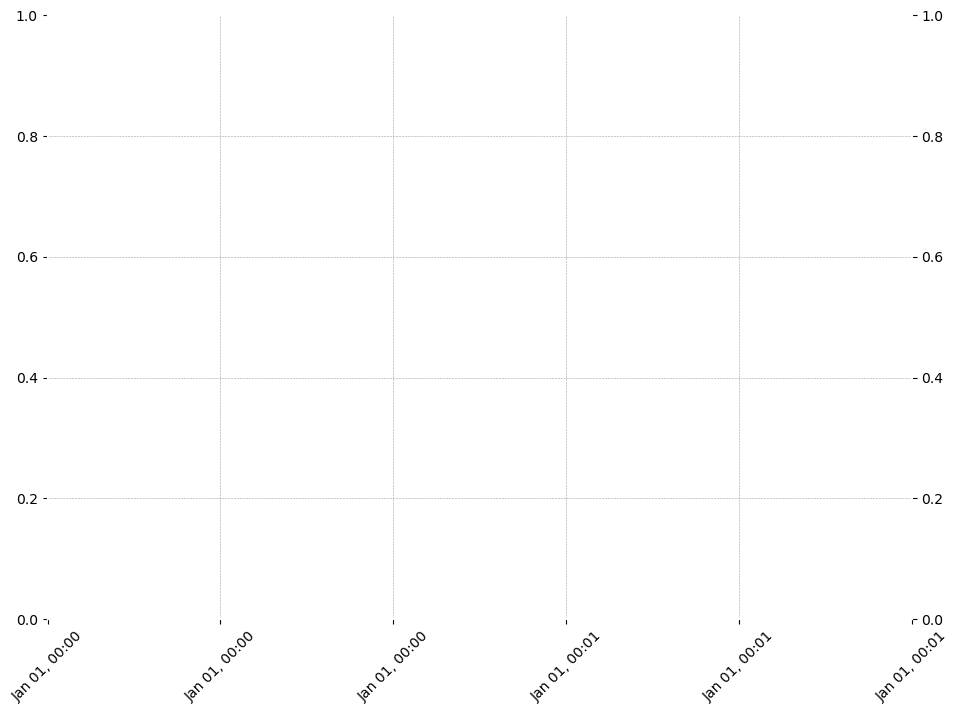

In [40]:
import pandas as pd
import mplfinance as mpf

def detect_reversal_candles(df):
    df['Signal'] = None  # عمود جديد للإشارات

    for i in range(2, len(df)):
        c1 = df.iloc[i-2]
        c2 = df.iloc[i-1]
        c3 = df.iloc[i]
        
        trend_c1 = "up" if c1['Close'] > c1['Open'] else "down"
        trend_c3 = "up" if c3['Close'] > c3['Open'] else "down"
        
        body_c1 = abs(c1['Close'] - c1['Open'])
        body_c2 = abs(c2['Close'] - c2['Open'])
        range_c1 = c1['High'] - c1['Low']
        range_c2 = c2['High'] - c2['Low']
        
        if (body_c1 > 0.5 * range_c1) and \
           (body_c2 < 0.2 * range_c2) and \
           ((trend_c3 == "down") if (trend_c1 == "up") else (trend_c3 == "up")):
            
            df.at[c3.name, 'Signal'] = 'Reversal'
    
    return df

# ---------------------------------------------------
# تجهيز البيانات من ملف CSV
# ---------------------------------------------------

# قراءة الملف
df= pd.read_csv(r"C:\Users\Access\Documents\AI ROBOT\XAUUSD_Candlestick_1_M_BID_2020-1-1_2024-12-31.csv")
# تحويل عمود التاريخ إلى datetime وتعيينه كمؤشر
df['Gmt time'] = pd.to_datetime(df['Gmt time'])
df.set_index('Gmt time', inplace=True)
df = df.head(3000)
# الكشف عن الإشارات
df = detect_reversal_candles(df)

# إعداد الإشارات للرسم
reversal_dates = df[df['Signal'] == 'Reversal'].index
apd = [mpf.make_addplot(df.loc[reversal_dates, 'Close'],
                        type='scatter',
                        markersize=100,
                        marker='^',
                        color='red',
                        panel=0)]

# رسم الشموع
mpf.plot(df,
         type='candle',
         style='charles',
         addplot=apd,
         title='Reversal Candles',
         ylabel='Price',
         figscale=1.5)


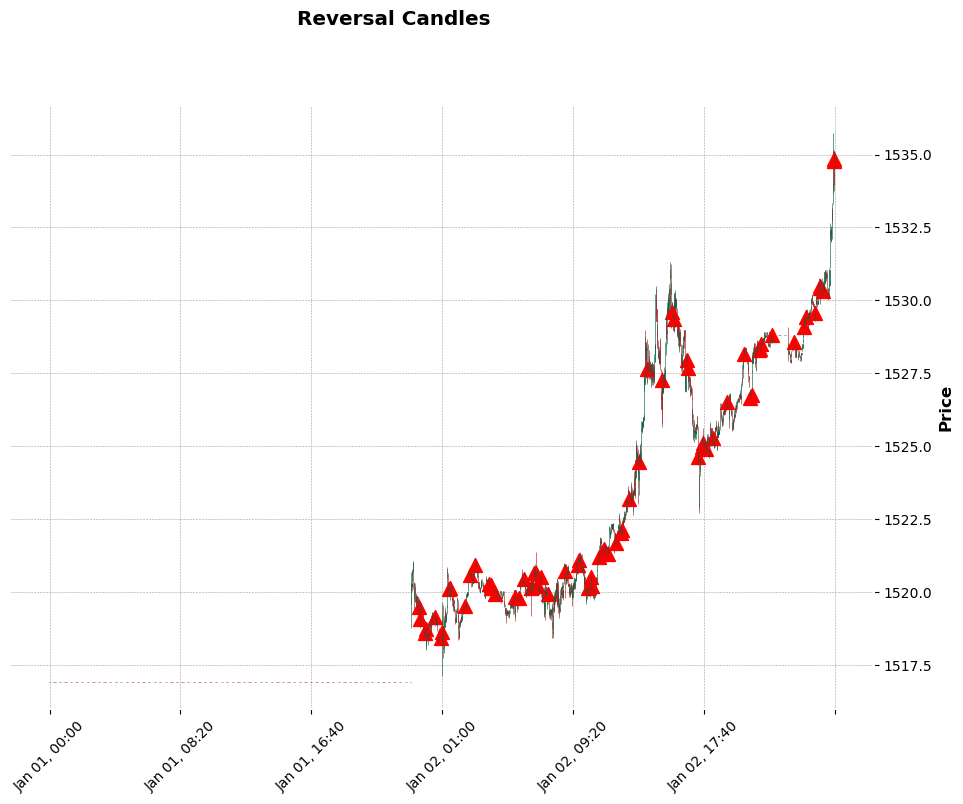

In [41]:
import pandas as pd
import numpy as np
import mplfinance as mpf

def detect_reversal_candles(df):
    df['Signal'] = None
    for i in range(2, len(df)):
        c1 = df.iloc[i-2]; c2 = df.iloc[i-1]; c3 = df.iloc[i]
        trend_c1 = "up" if c1['Close'] > c1['Open'] else "down"
        trend_c3 = "up" if c3['Close'] > c3['Open'] else "down"
        body_c1, body_c2 = abs(c1['Close'] - c1['Open']), abs(c2['Close'] - c2['Open'])
        range_c1, range_c2 = c1['High'] - c1['Low'], c2['High'] - c2['Low']
        if (body_c1 > 0.5 * range_c1) and \
           (body_c2 < 0.2 * range_c2) and \
           ((trend_c3 == "down") if (trend_c1 == "up") else (trend_c3 == "up")):
            df.at[c3.name, 'Signal'] = 'Reversal'
    return df

# قراءة الملف
df= pd.read_csv(r"C:\Users\Access\Documents\AI ROBOT\XAUUSD_Candlestick_1_M_BID_2020-1-1_2024-12-31.csv")
# تحويل عمود التاريخ إلى datetime وتعيينه كمؤشر
df['Gmt time'] = pd.to_datetime(df['Gmt time'])
df.set_index('Gmt time', inplace=True)
df = df.head(3000)
# الكشف عن الإشارات
df = detect_reversal_candles(df)

# 4. تحضير Series للإشارات بطول DF كامل
signal = pd.Series(np.nan, index=df.index)
reversal_dates = df.index[df['Signal'] == 'Reversal']
signal.loc[reversal_dates] = df.loc[reversal_dates, 'Close']

# 5. إنشاء الـaddplot
apd = [mpf.make_addplot(
           signal,
           type='scatter',
           markersize=100,
           marker='^',
           color='red'
       )]

# 6. الرسم مع كتم التحذير لو أحببت
mpf.plot(
    df,
    type='candle',
    style='charles',
    addplot=apd,
    title='Reversal Candles',
    ylabel='Price',
    figscale=1.5,
    warn_too_much_data=len(df)*2    # أي رقم أكبر من len(df)
)


In [42]:
# 1. افترض أنّ df ناتج عن detect_reversal_candles
# df = detect_reversal_candles(df)

# 2. اختَر فقط الصفوف التي فيها إشارة
signals = df[df['Signal'].notnull()]

# 3. اطبَع كل نوع إشارة على حدة
for sig_type in signals['Signal'].unique():
    print(f"\n=== {sig_type} Candles ===")
    subset = signals[signals['Signal'] == sig_type]
    print(subset[['Open','High','Low','Close','Volume']])



=== Reversal Candles ===
                         Open      High       Low     Close  Volume
Gmt time                                                           
2020-01-01 23:31:00  1519.528  1519.528  1519.318  1519.478  0.0052
2020-01-01 23:37:00  1518.978  1519.178  1518.878  1519.078  0.0075
2020-01-01 23:53:00  1518.768  1518.795  1518.578  1518.578  0.0104
2020-01-02 00:00:00  1518.305  1518.755  1518.008  1518.715  0.0284
2020-01-02 00:34:00  1518.908  1519.208  1518.908  1519.115  0.0147
...                       ...       ...       ...       ...     ...
2020-01-03 01:02:00  1530.065  1530.435  1529.868  1530.428  0.0190
2020-01-03 01:04:00  1530.485  1530.675  1530.485  1530.485  0.0163
2020-01-03 01:14:00  1530.638  1530.668  1530.238  1530.328  0.0110
2020-01-03 01:57:00  1533.955  1534.958  1533.948  1534.768  0.0518
2020-01-03 01:59:00  1534.865  1534.928  1534.235  1534.848  0.0765

[68 rows x 5 columns]


In [45]:
import pandas as pd
import numpy as np
import mplfinance as mpf

def detect_reversal_candles(df):
    df['Signal'] = None
    for i in range(2, len(df)):
        c1, c2, c3 = df.iloc[i-2], df.iloc[i-1], df.iloc[i]
        trend_c1 = "up" if c1['Close'] > c1['Open'] else "down"
        trend_c3 = "up" if c3['Close'] > c3['Open'] else "down"
        body_c1, body_c2 = abs(c1['Close'] - c1['Open']), abs(c2['Close'] - c2['Open'])
        range_c1, range_c2 = c1['High'] - c1['Low'], c2['High'] - c2['Low']
        if (body_c1 > 0.5 * range_c1) and \
           (body_c2 < 0.2 * range_c2) and \
           ((trend_c3 == "down") if (trend_c1 == "up") else (trend_c3 == "up")):
            df.at[c3.name, 'Signal'] = 'Reversal'
    return df

# قراءة الملف
df= pd.read_csv(r"C:\Users\Access\Documents\AI ROBOT\XAUUSD_Candlestick_1_M_BID_2020-1-1_2024-12-31.csv")
# تحويل عمود التاريخ إلى datetime وتعيينه كمؤشر
df['Gmt time'] = pd.to_datetime(df['Gmt time'])
df.set_index('Gmt time', inplace=True)
df = df.head(3000)
# الكشف عن الإشارات
df = detect_reversal_candles(df)

# --- رسم كل ثلاث شموع عند كل إشارة ---
reversal_dates = df.index[df['Signal'] == 'Reversal']
for date in reversal_dates:
    # نأخذ ثلاث صفوف: الإشارة نفسها والشمعتين السابقتين
    df_slice = df.loc[:date].iloc[-3:]
    mpf.plot(
        df_slice,
        type='candle',
        style='charles',
        title=f'Reversal Pattern on {date.date()}',
        ylabel='Price',
        figscale=1.2,
        savefig=f'reversal_{date.date()}.png'   # يحفظ صورة لكل نمط في ملف PNG
    )


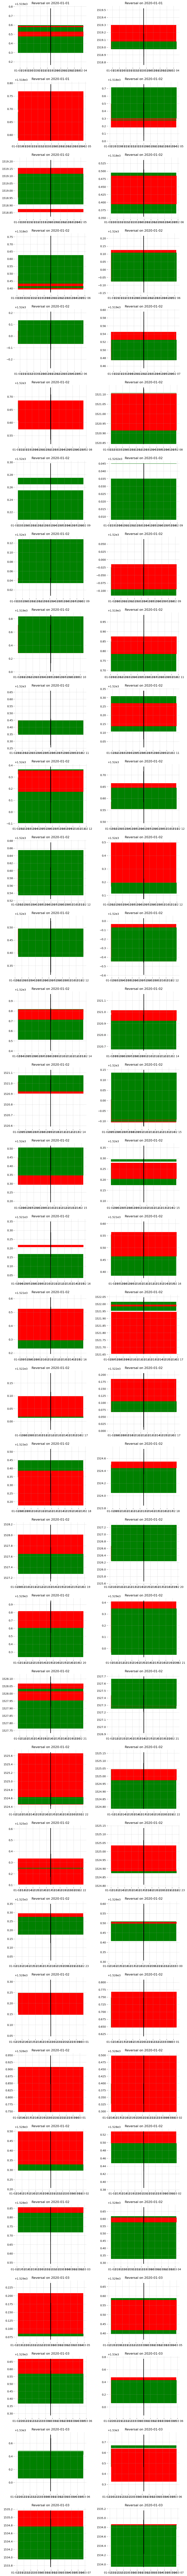

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math

# قراءة الملف
df= pd.read_csv(r"C:\Users\Access\Documents\AI ROBOT\XAUUSD_Candlestick_1_M_BID_2020-1-1_2024-12-31.csv")
# تحويل عمود التاريخ إلى datetime وتعيينه كمؤشر
df['Gmt time'] = pd.to_datetime(df['Gmt time'])
df.set_index('Gmt time', inplace=True)
df = df.head(3000)


# 2. دالة اكتشاف الإشارات (كما قبل)
def detect_reversal_candles(df):
    df['Signal'] = None
    for i in range(2, len(df)):
        c1, c2, c3 = df.iloc[i-2], df.iloc[i-1], df.iloc[i]
        trend_c1 = "up" if c1['Close'] > c1['Open'] else "down"
        trend_c3 = "up" if c3['Close'] > c3['Open'] else "down"
        body_c1, body_c2 = abs(c1['Close'] - c1['Open']), abs(c2['Close'] - c2['Open'])
        range_c1, range_c2 = c1['High'] - c1['Low'], c2['High'] - c2['Low']
        if (body_c1 > 0.5 * range_c1) and \
           (body_c2 < 0.2 * range_c2) and \
           ((trend_c3 == "down") if (trend_c1 == "up") else (trend_c3 == "up")):
            df.at[c3.name, 'Signal'] = 'Reversal'
    return df

df = detect_reversal_candles(df)

# 3. جمع شرائح الشموع لكل إشارة
patterns = []
for date in df.index[df['Signal'] == 'Reversal']:
    slice_df = df.loc[:date].iloc[-3:]
    patterns.append((date, slice_df))

# 4. رسم الشموع يدويًا
def plot_candles(ax, data):
    dates = mdates.date2num(data.index.to_pydatetime())
    opens = data['Open'].values
    highs = data['High'].values
    lows = data['Low'].values
    closes = data['Close'].values
    width = 0.4
    color_up = 'green'
    color_down = 'red'
    for d, o, h, l, c in zip(dates, opens, highs, lows, closes):
        color = color_up if c >= o else color_down
        ax.plot([d, d], [l, h], color='black')
        ax.add_patch(plt.Rectangle((d - width/2, min(o, c)), width, abs(c-o), color=color))
    ax.xaxis_date()
    ax.set_title(ax.get_title())

# إعداد اللوحات
n = len(patterns)
cols = 2
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(10, 4*rows))
axes = axes.flatten()

# رسم كل نمط
for ax, (date, pattern_df) in zip(axes, patterns):
    ax.set_title(f'Reversal on {date.date()}')
    plot_candles(ax, pattern_df)

# إخفاء اللوحات الفارغة
for ax in axes[n:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


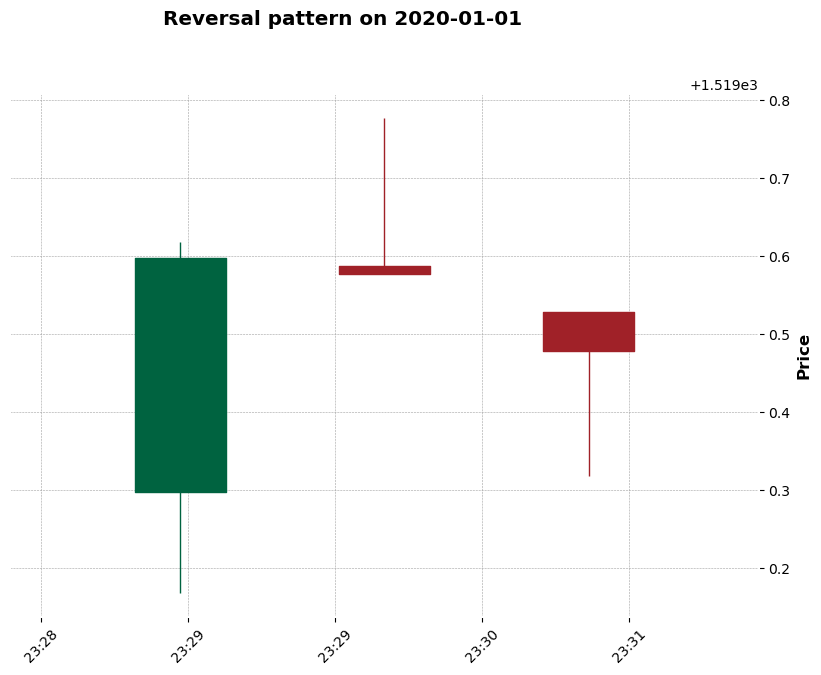

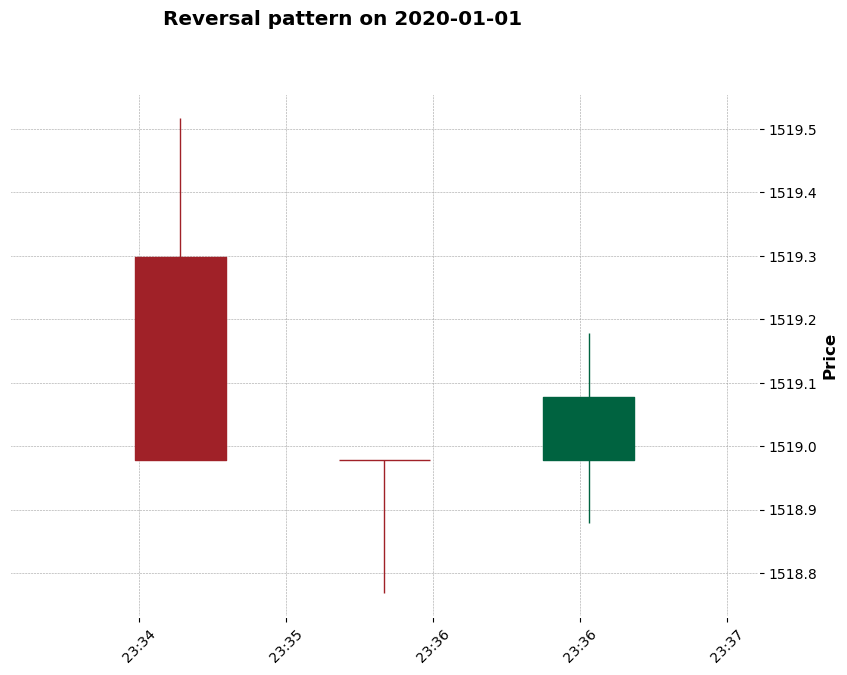

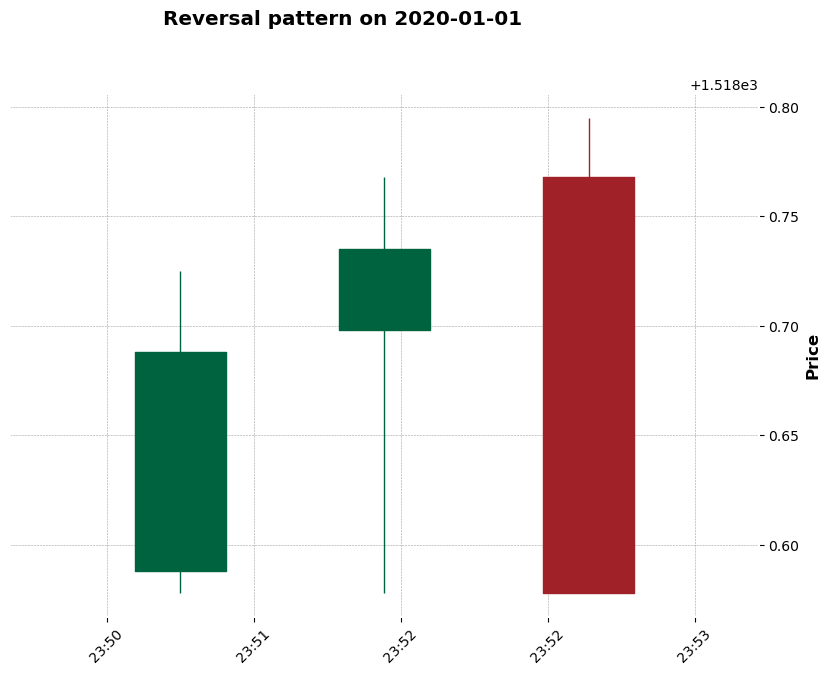

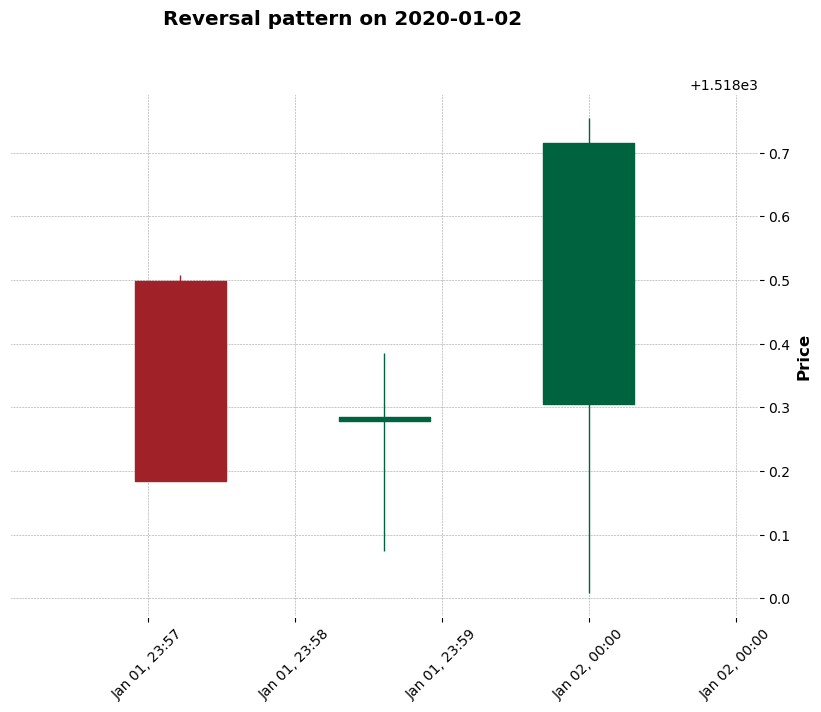

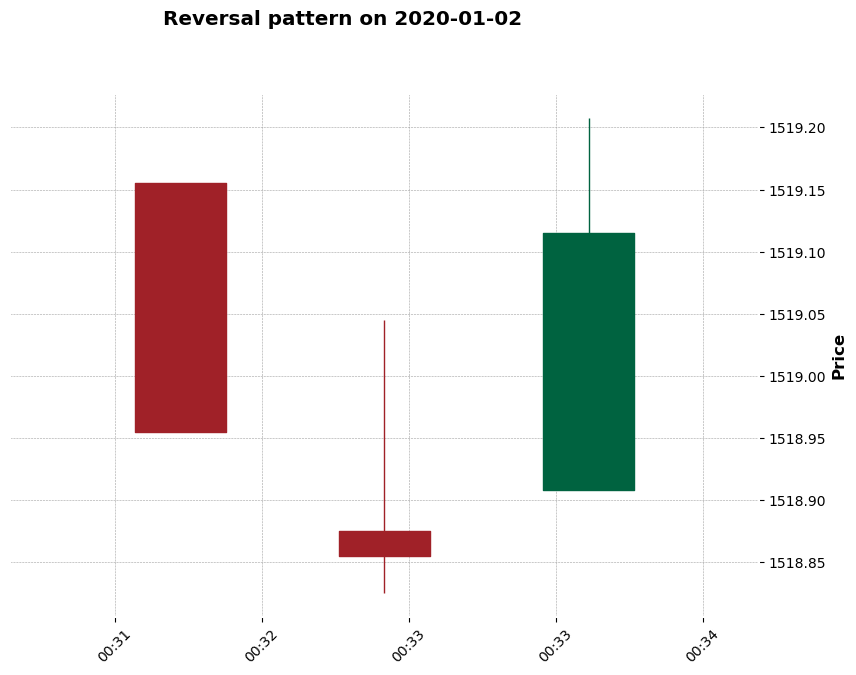

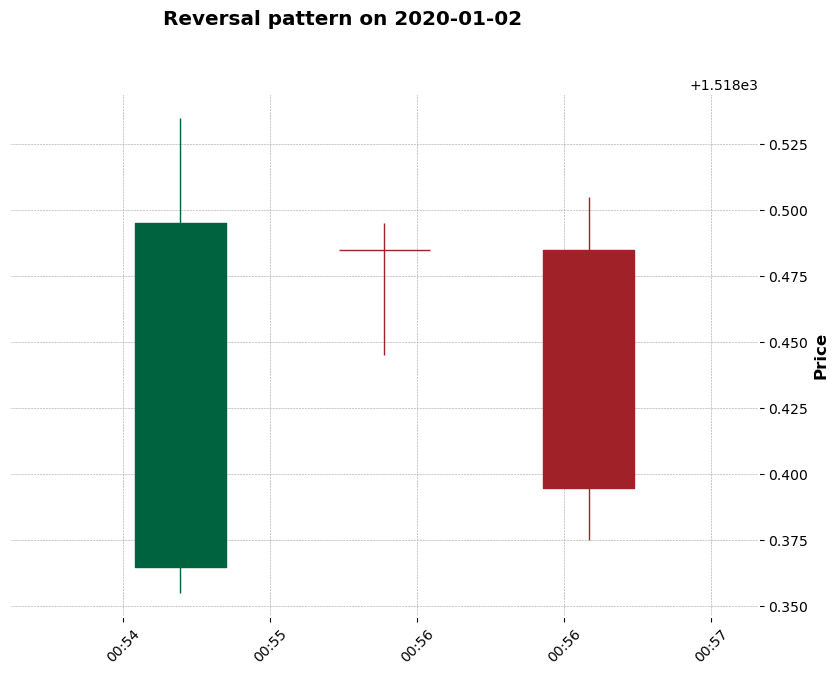

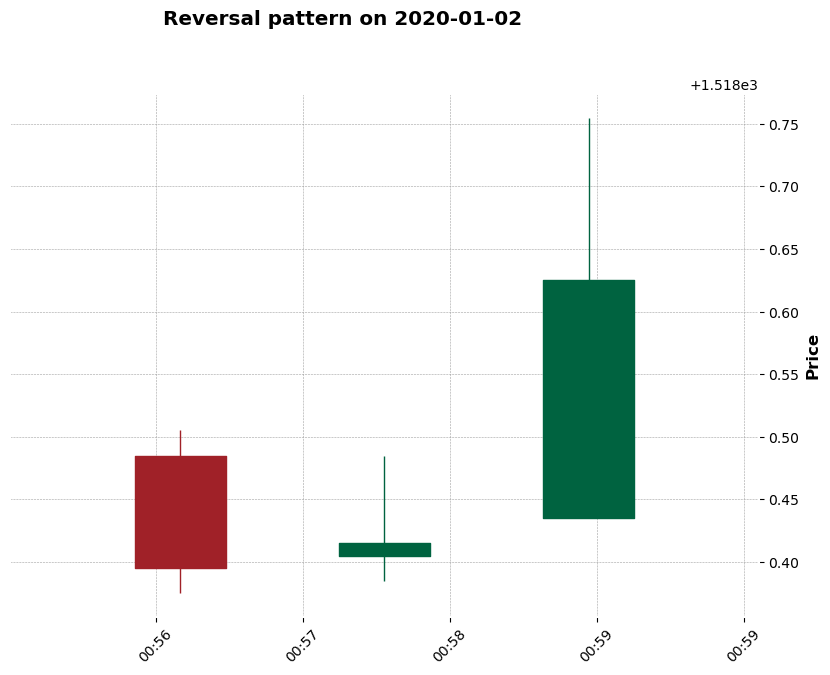

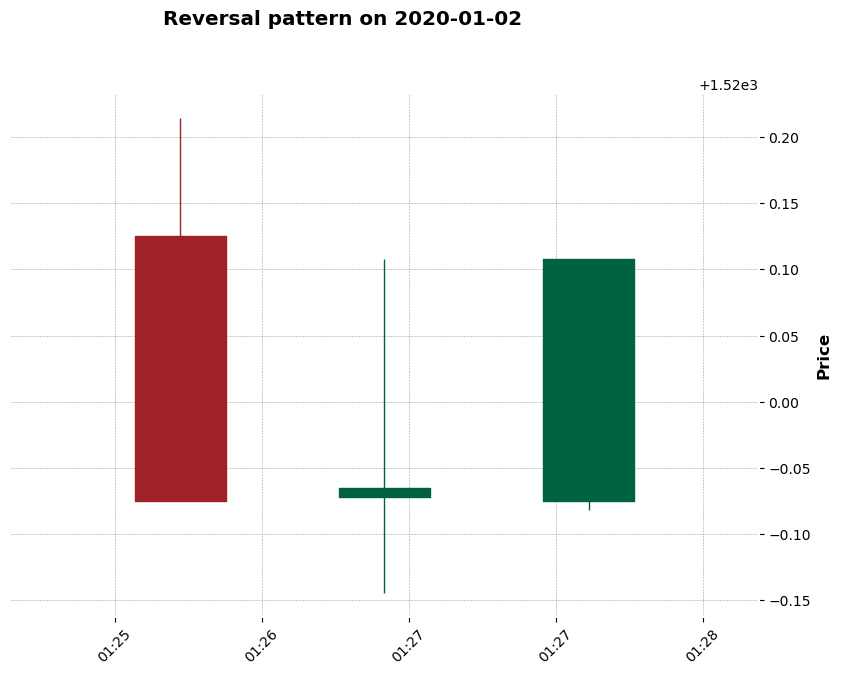

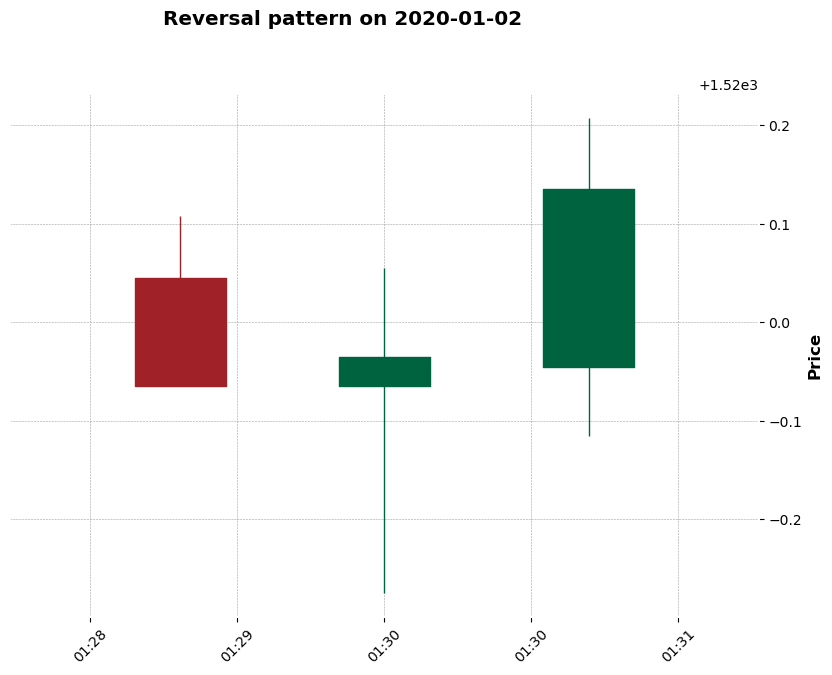

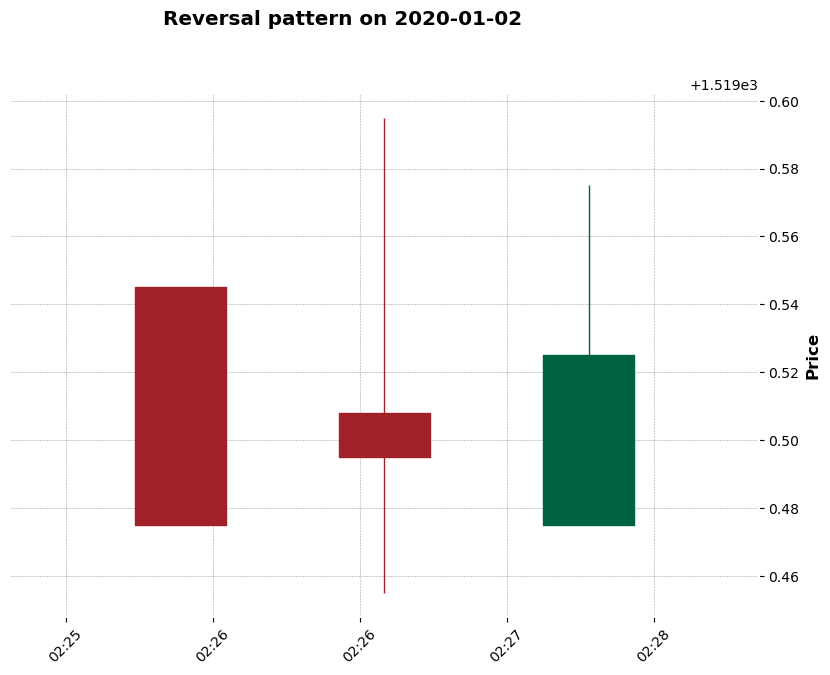

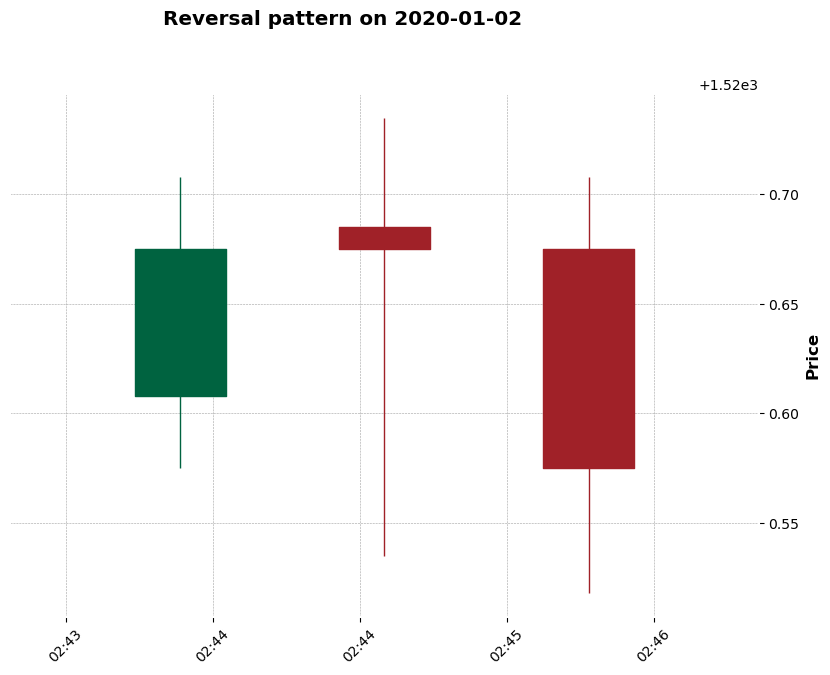

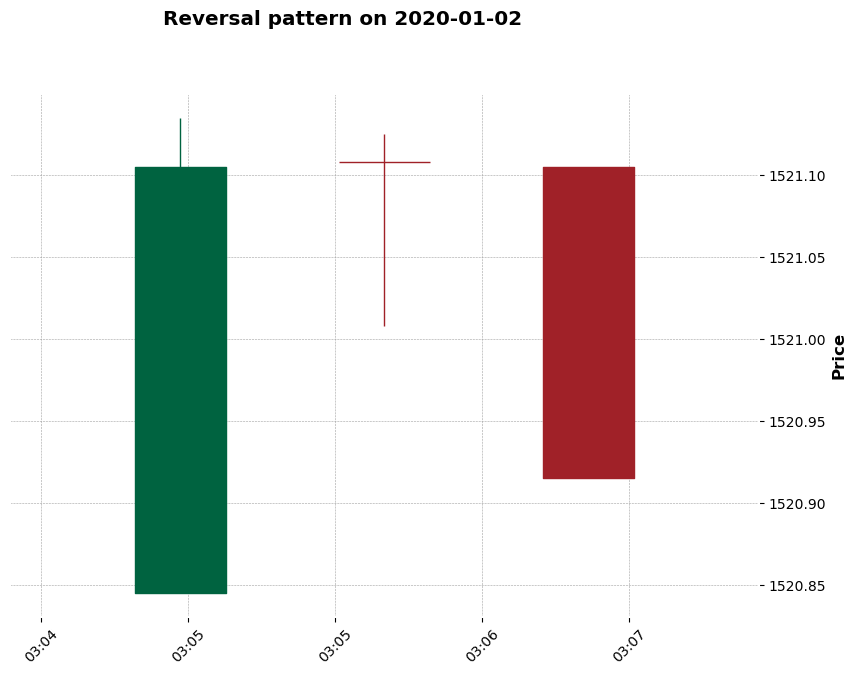

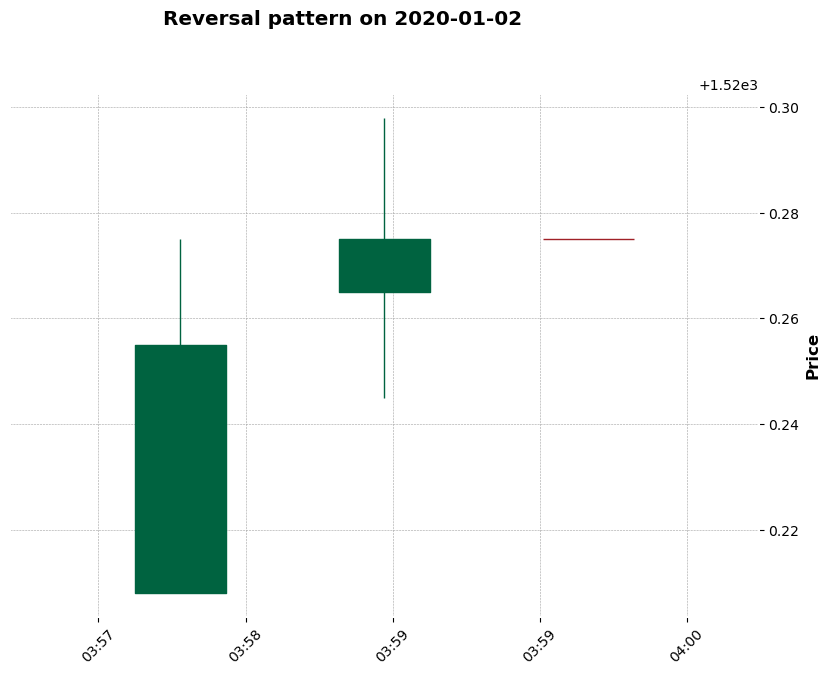

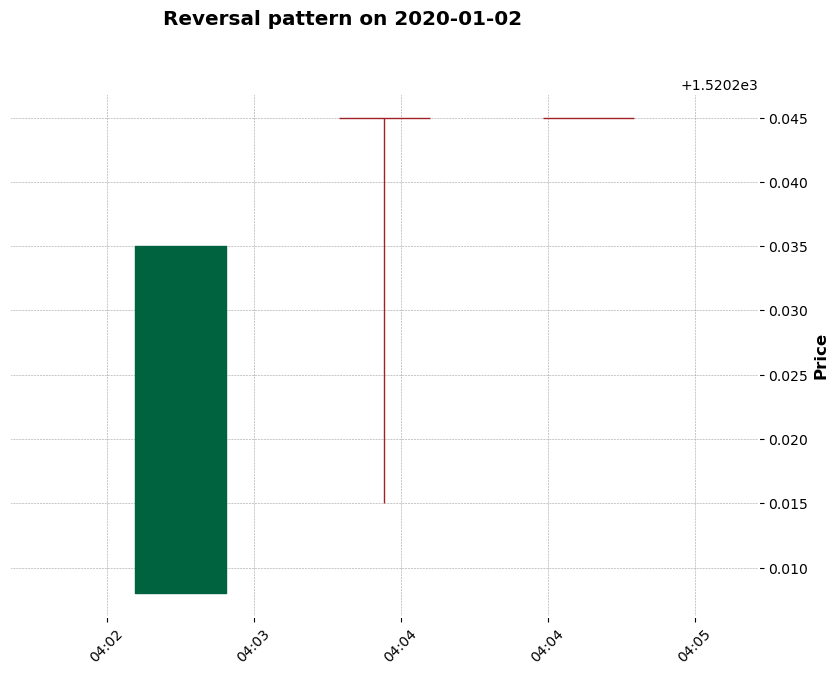

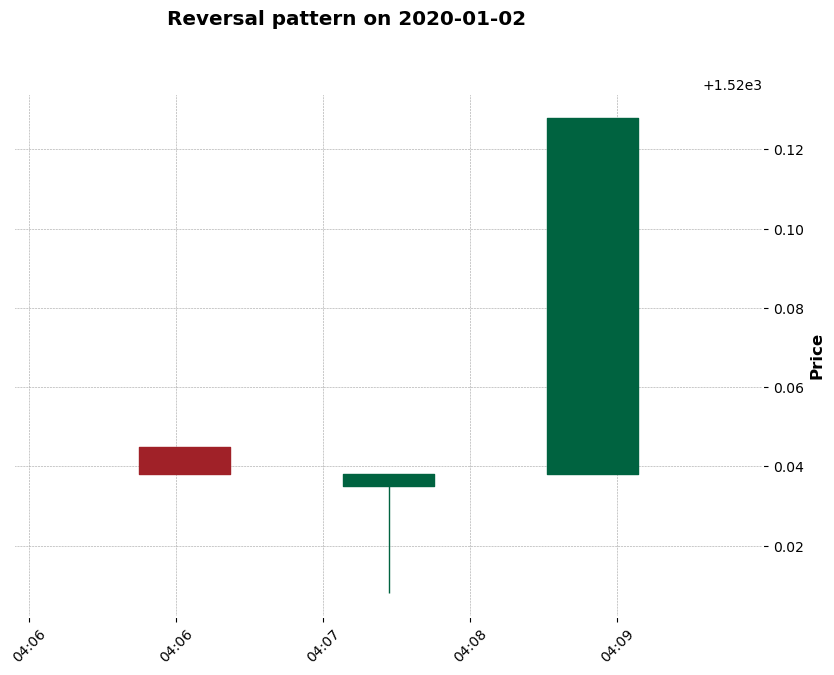

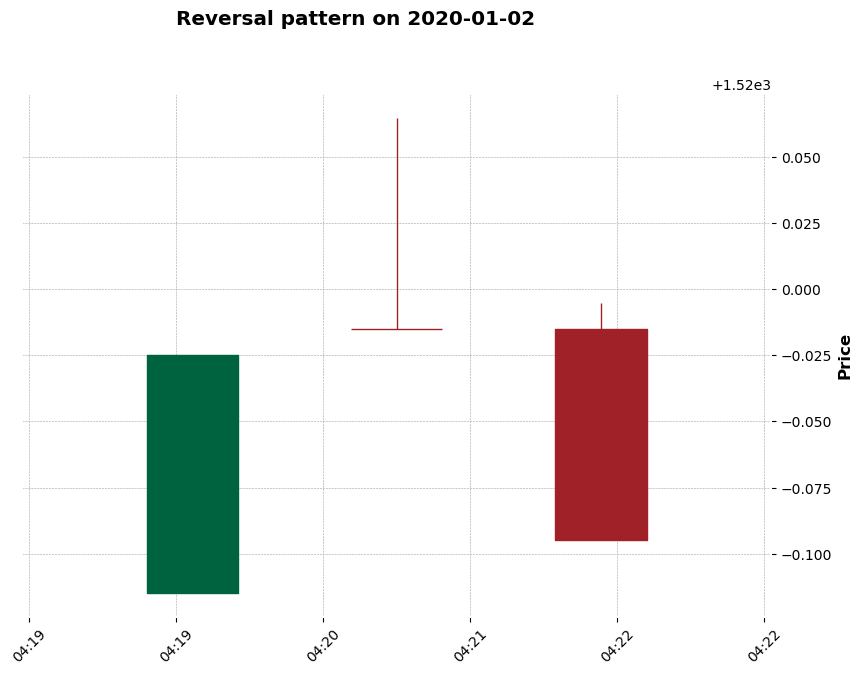

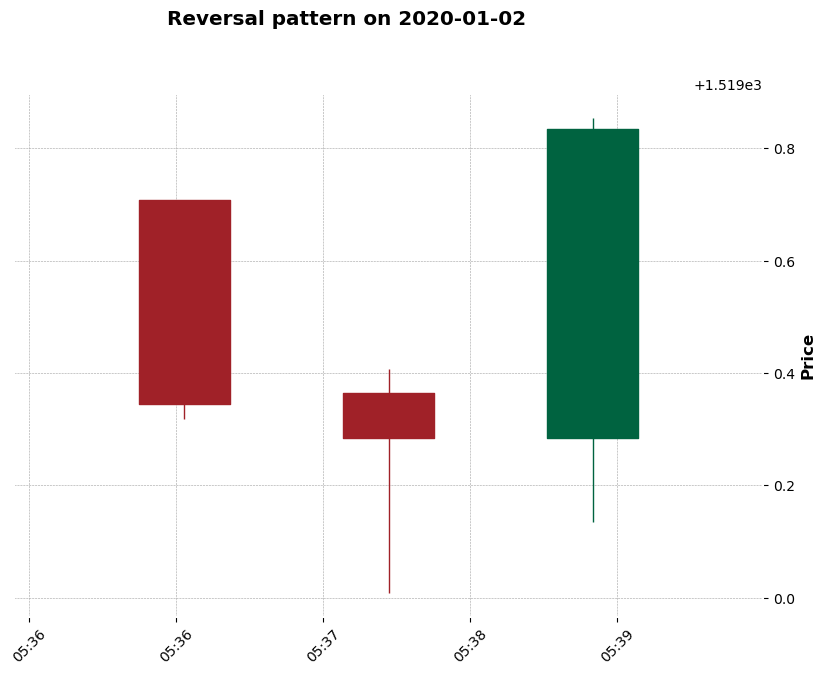

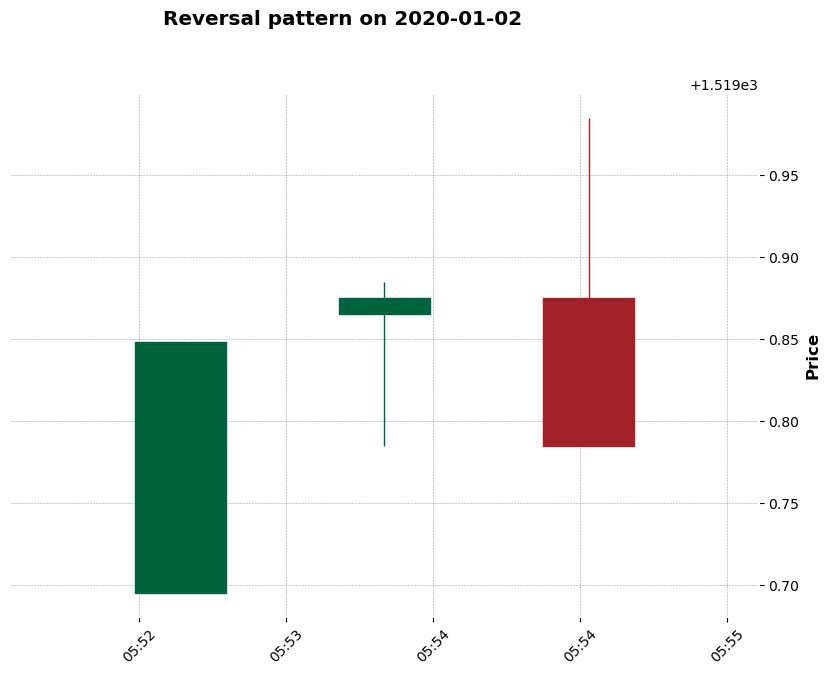

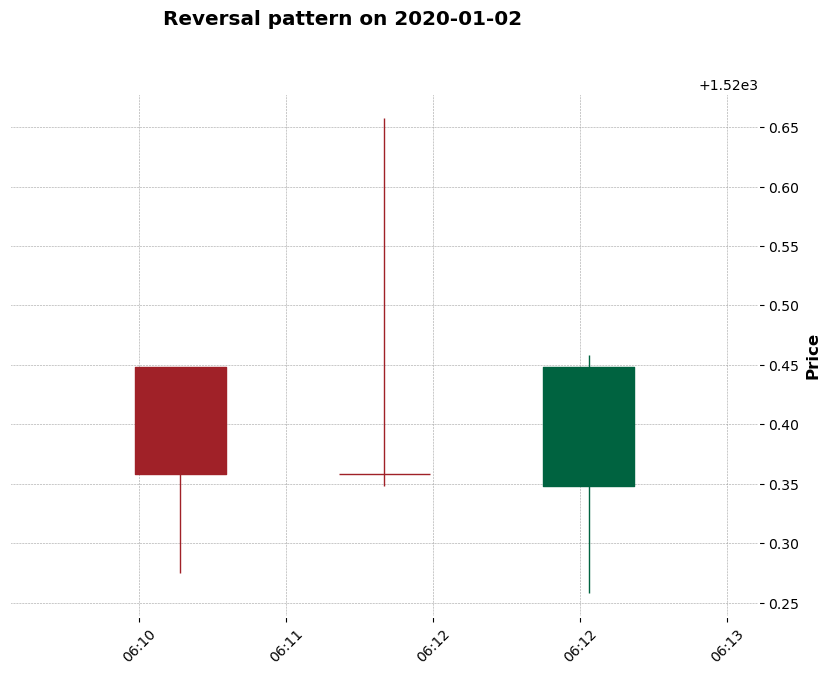

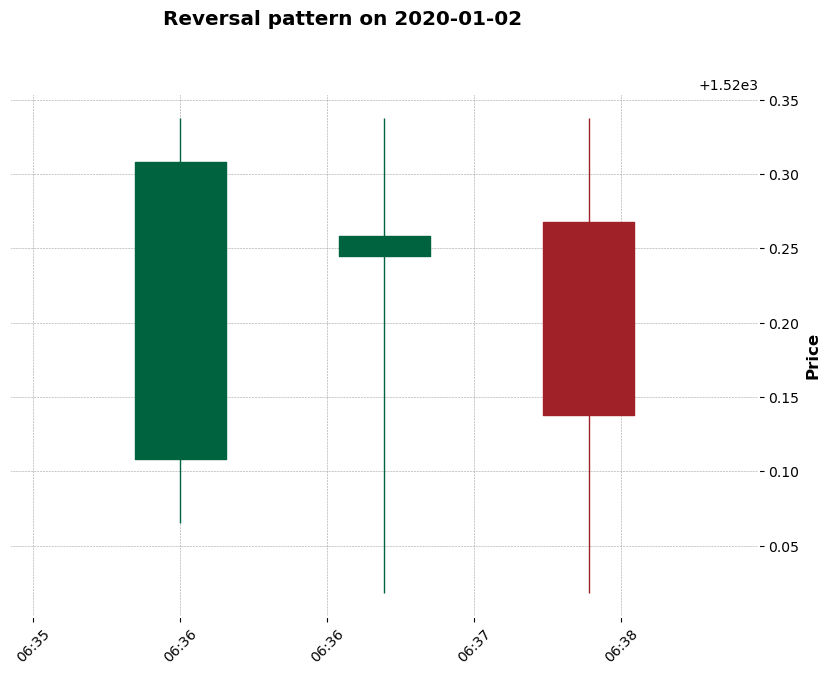

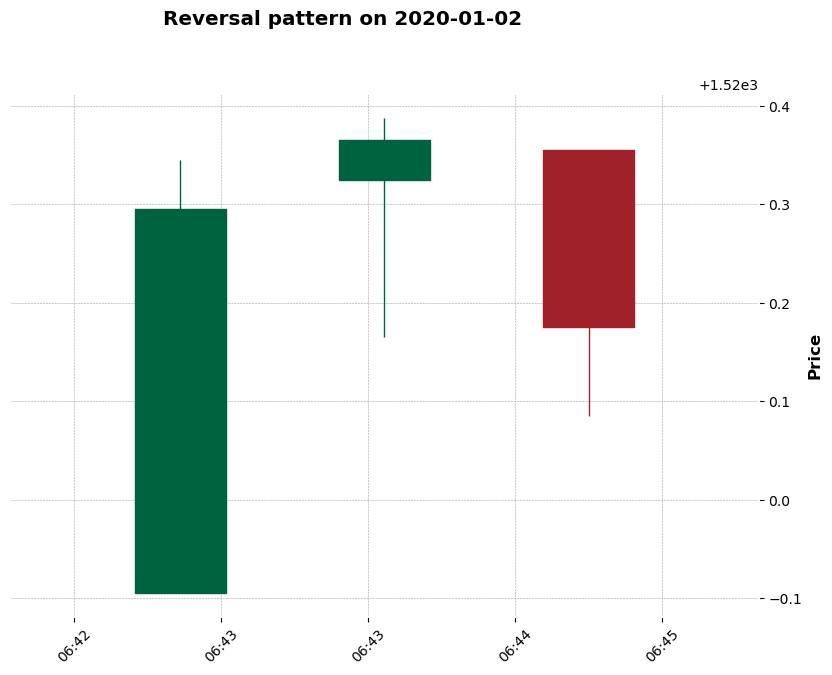

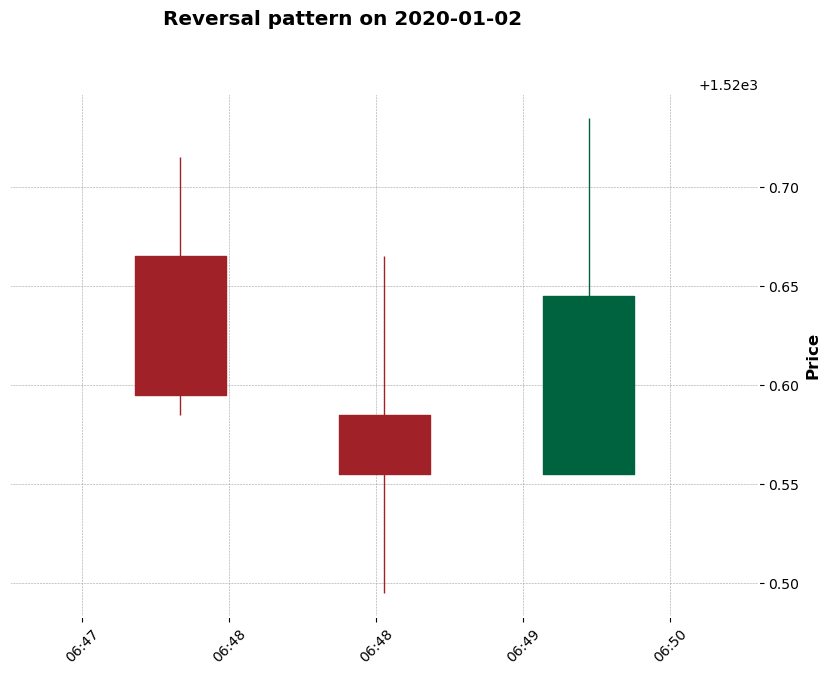

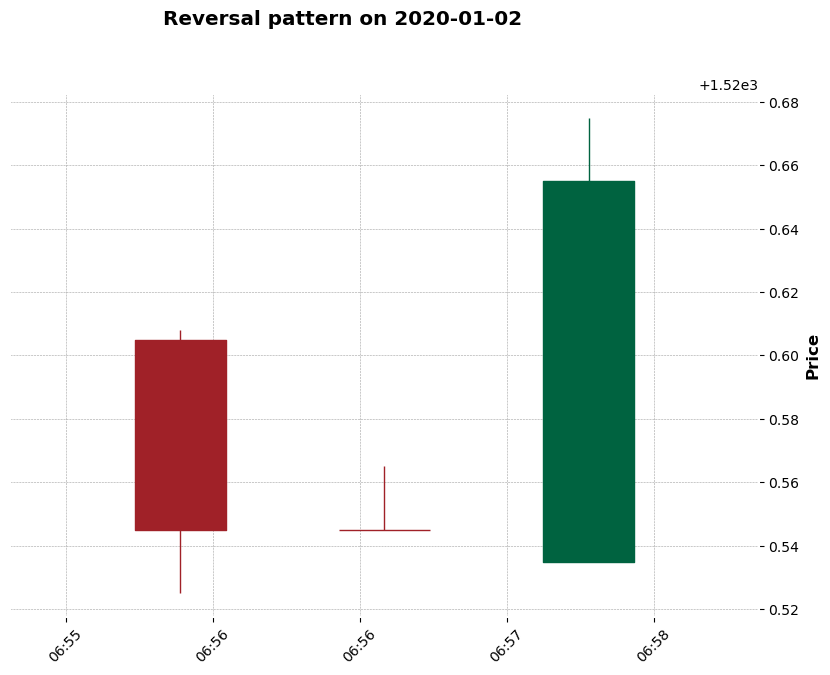

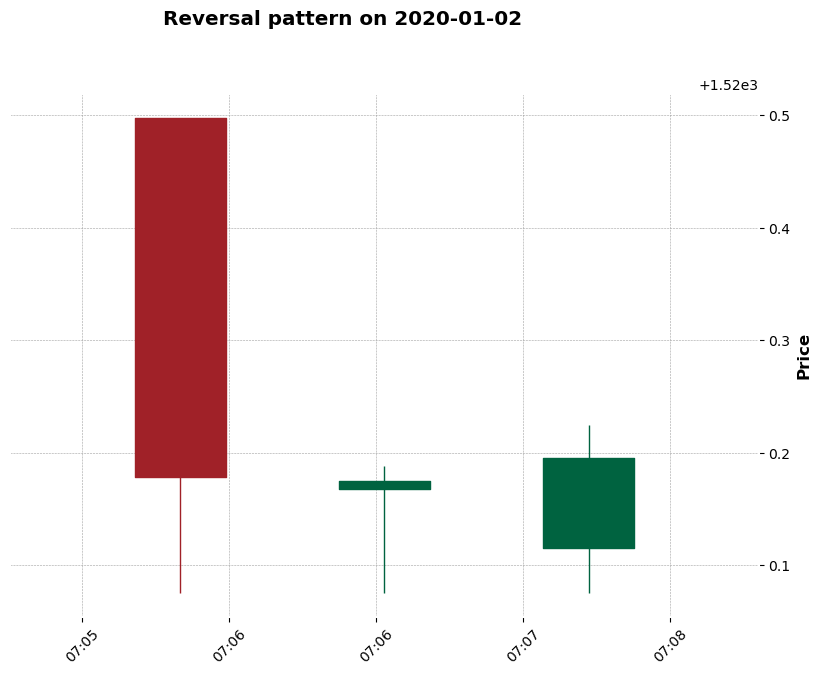

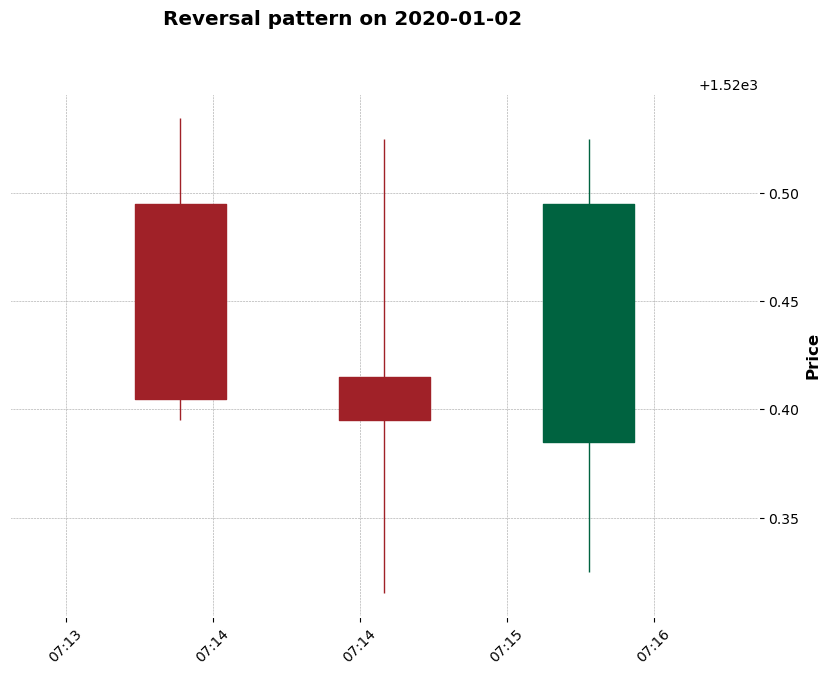

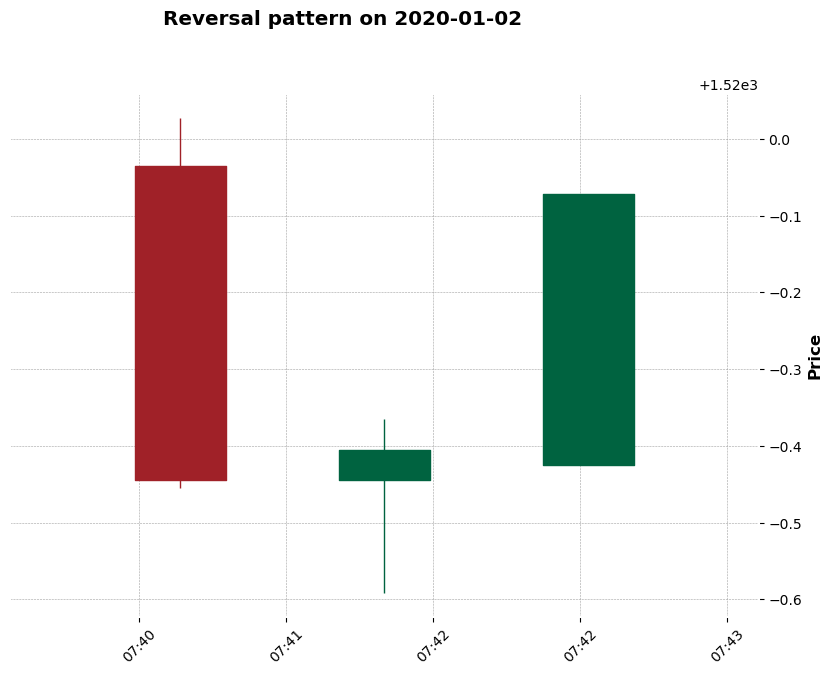

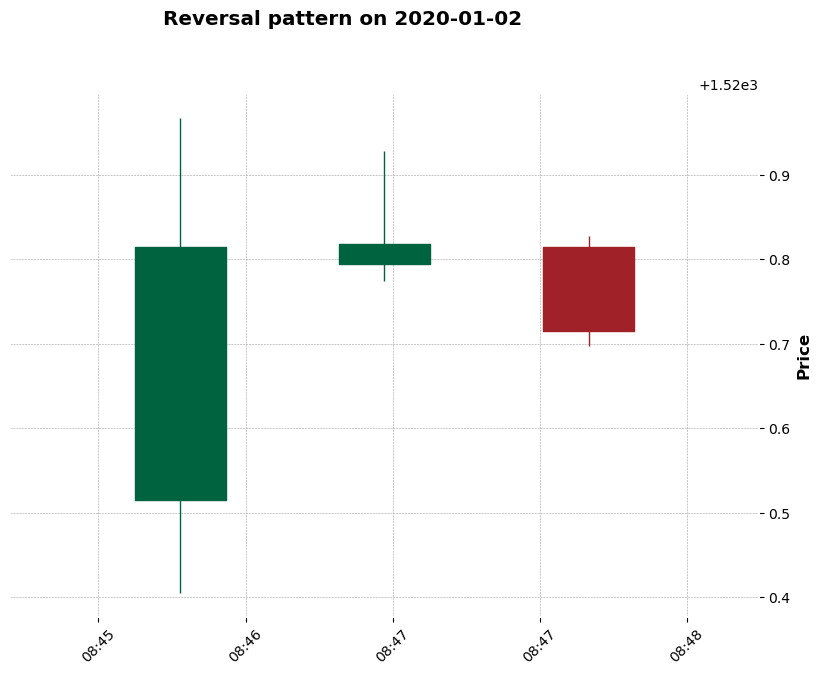

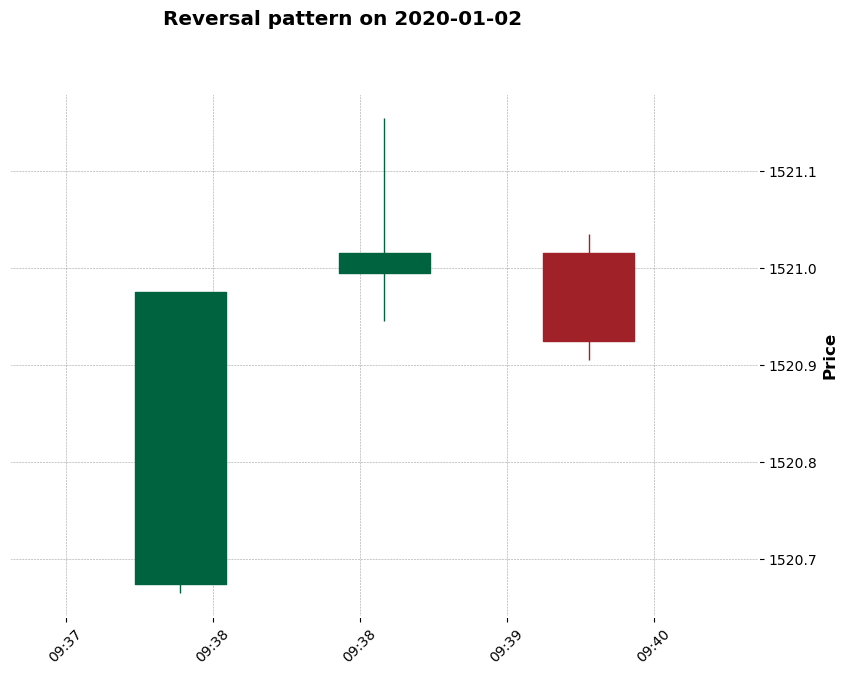

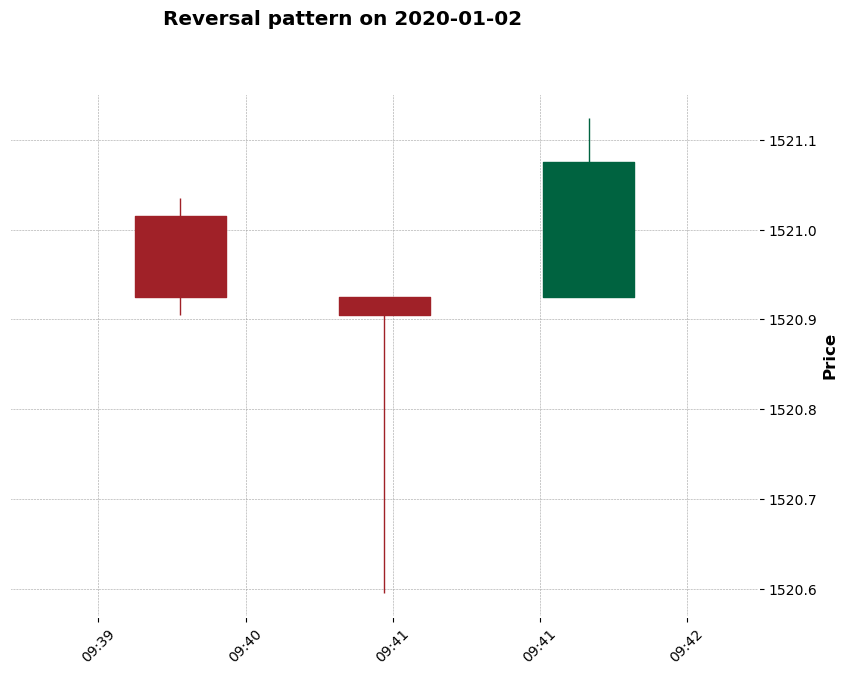

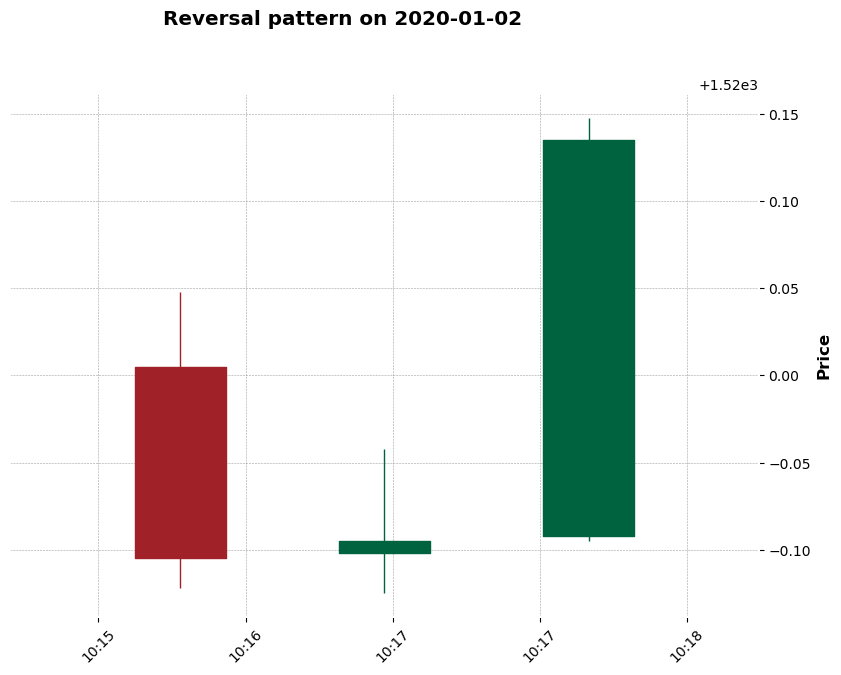

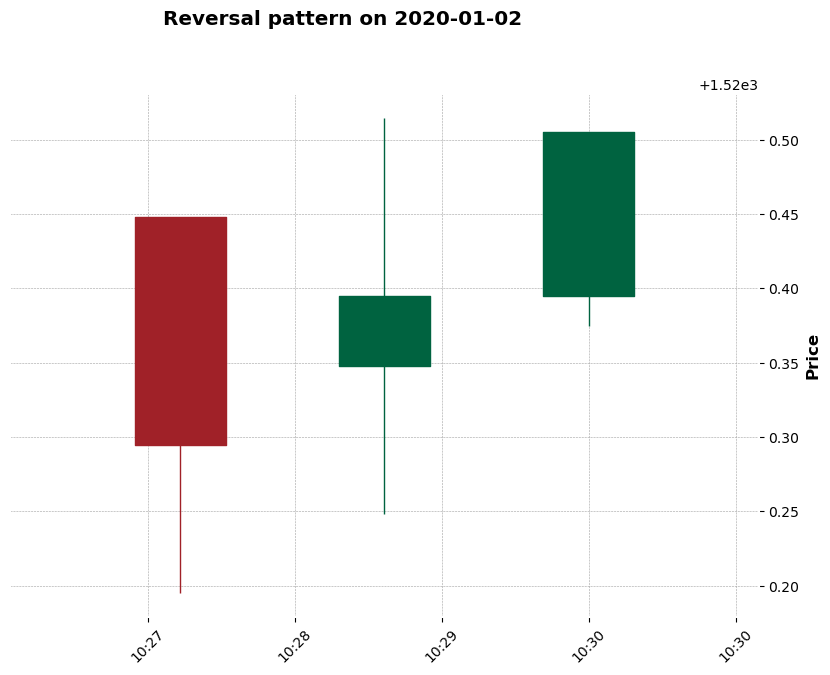

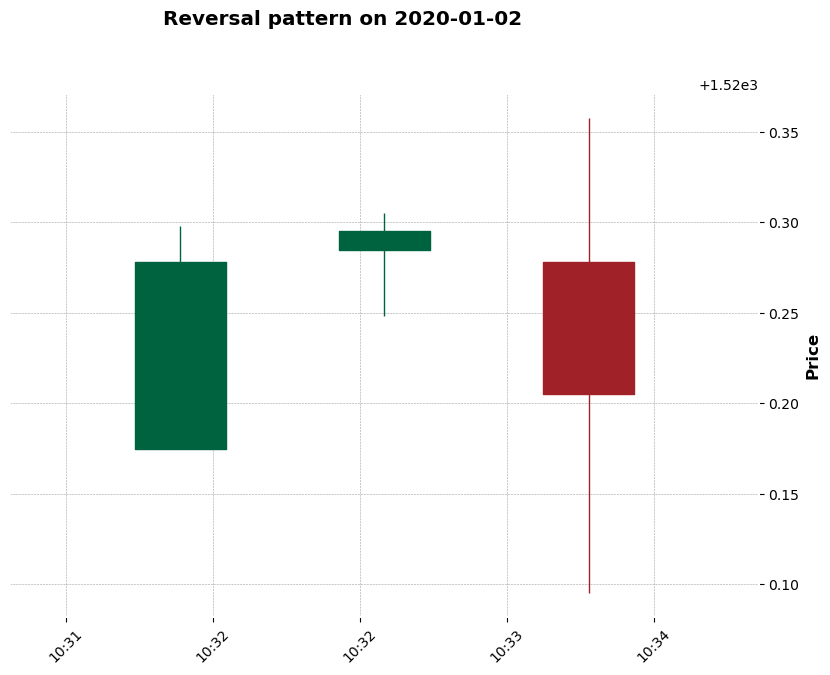

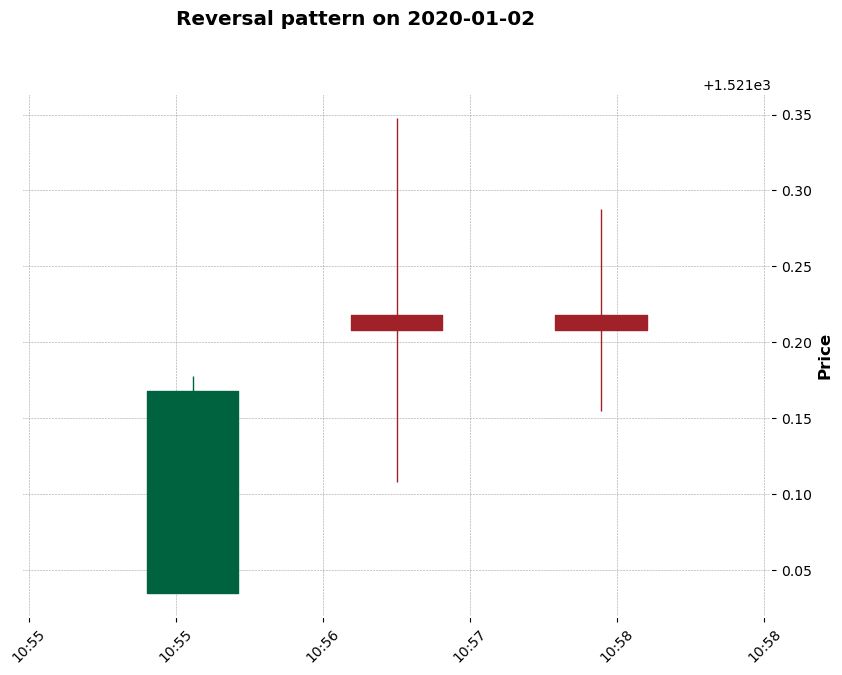

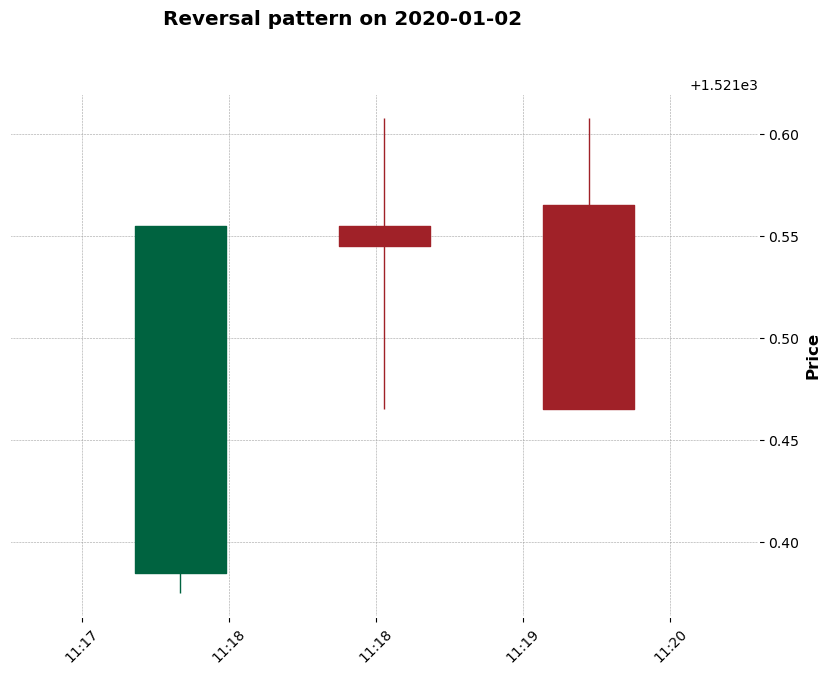

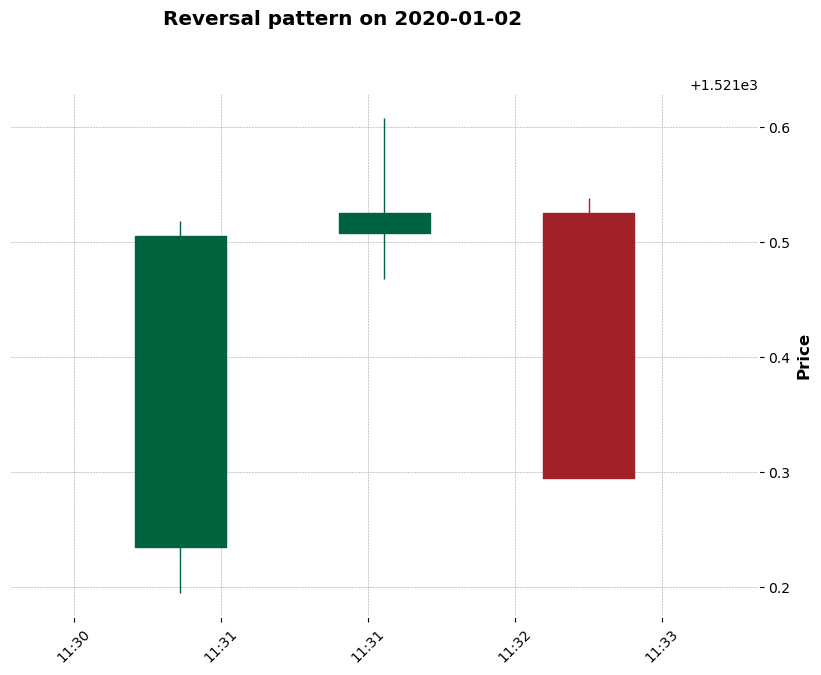

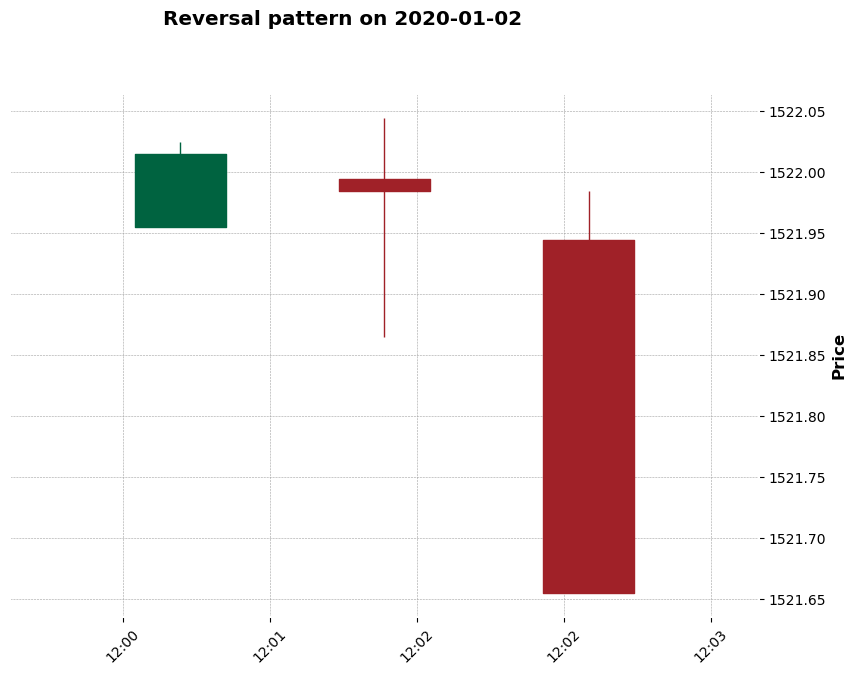

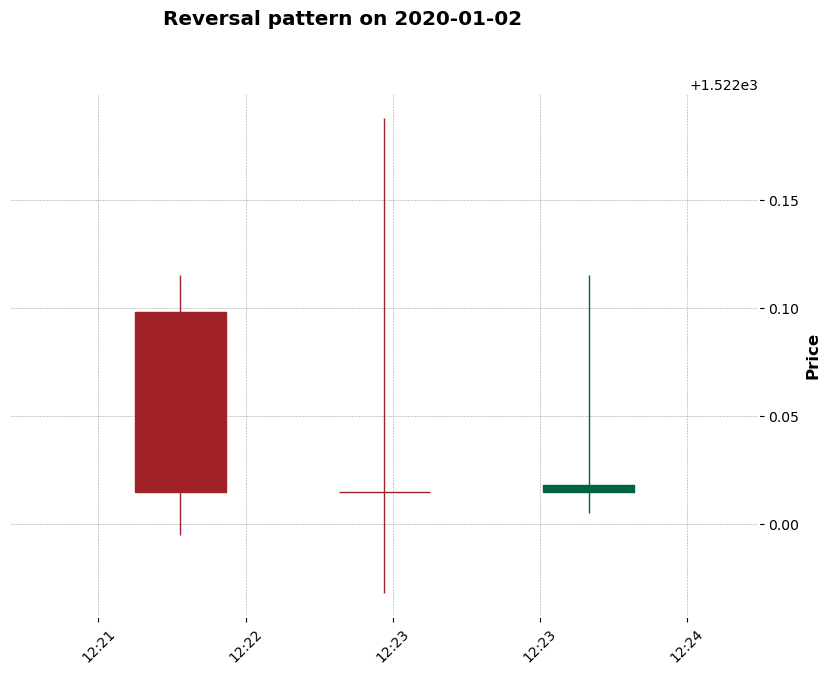

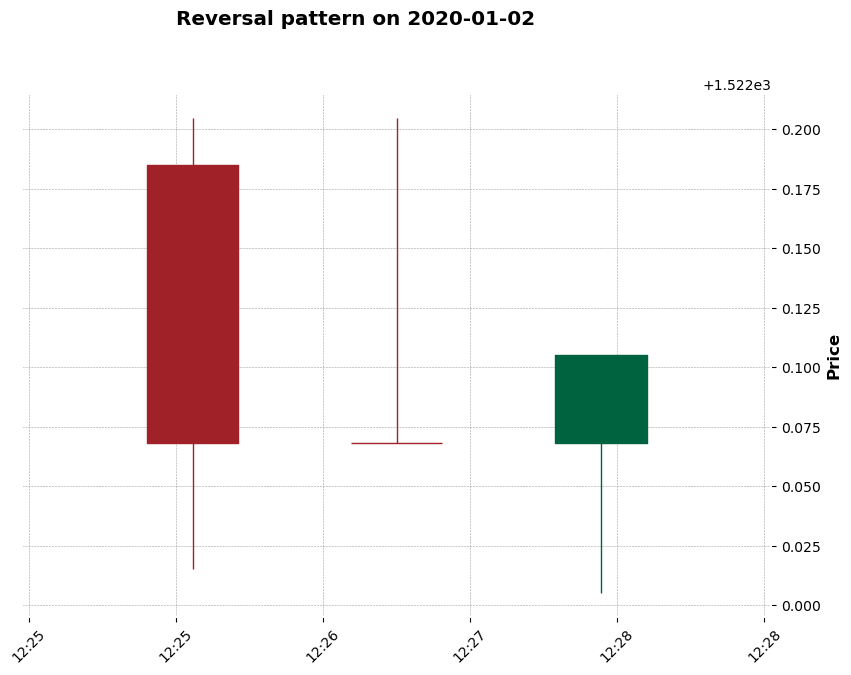

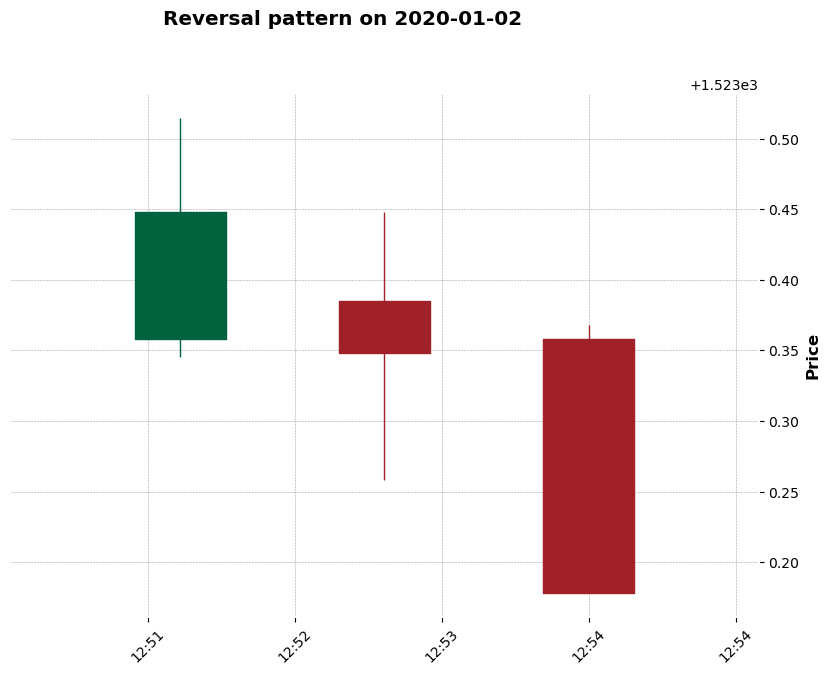

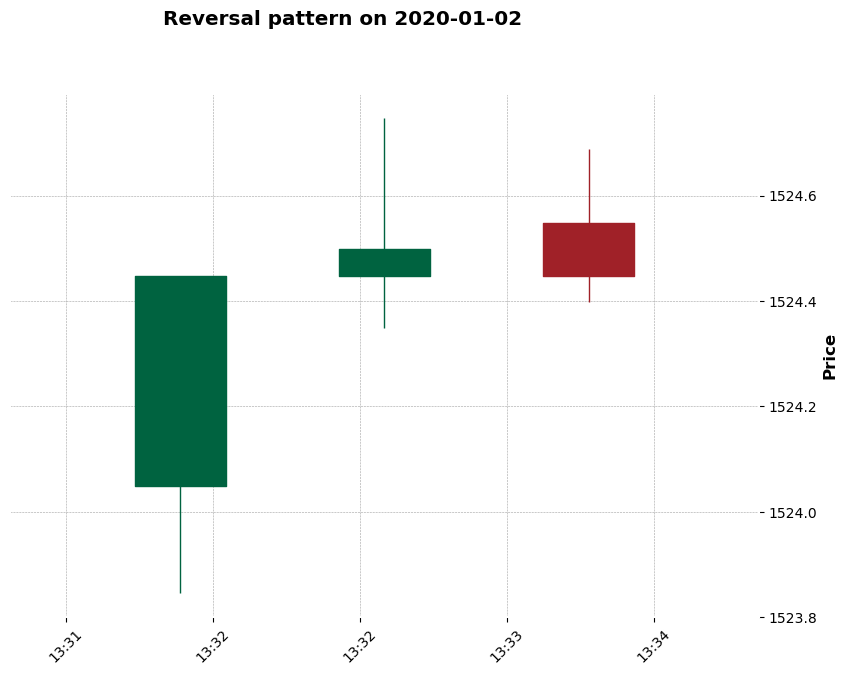

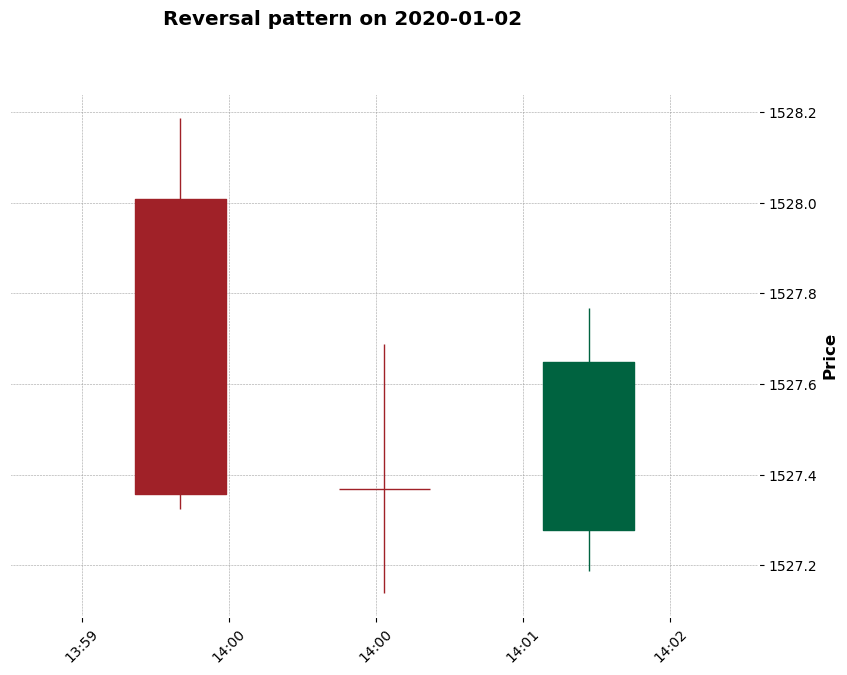

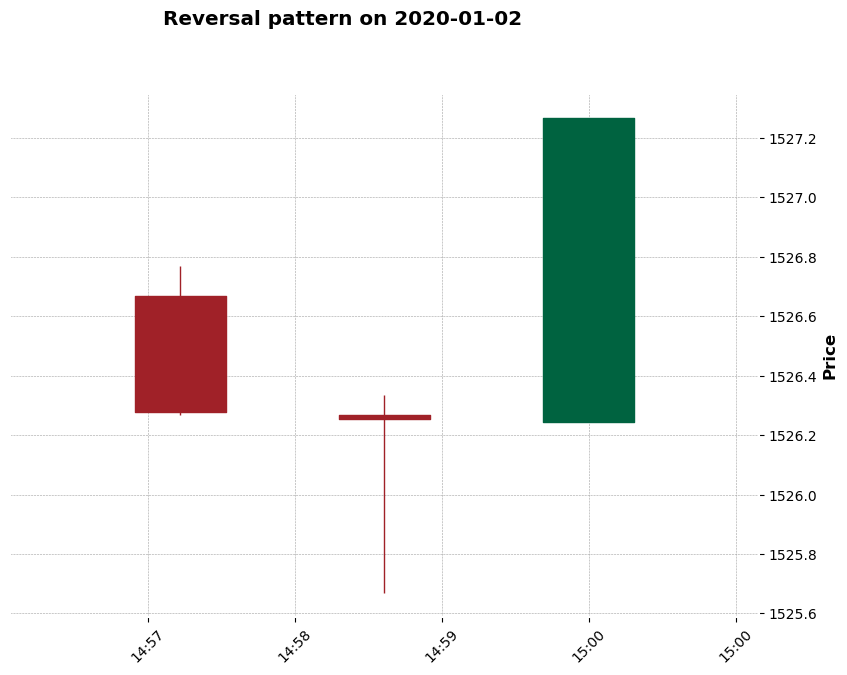

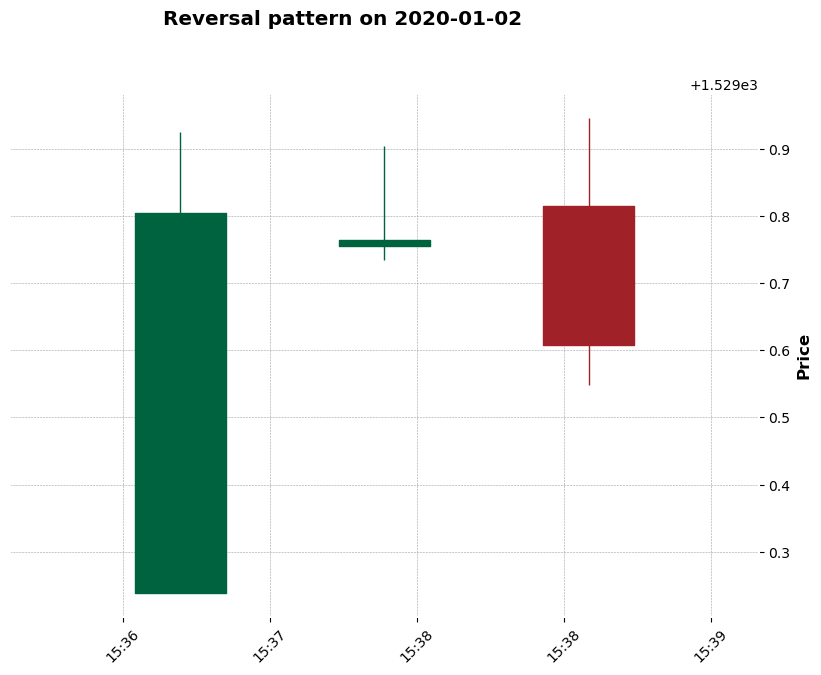

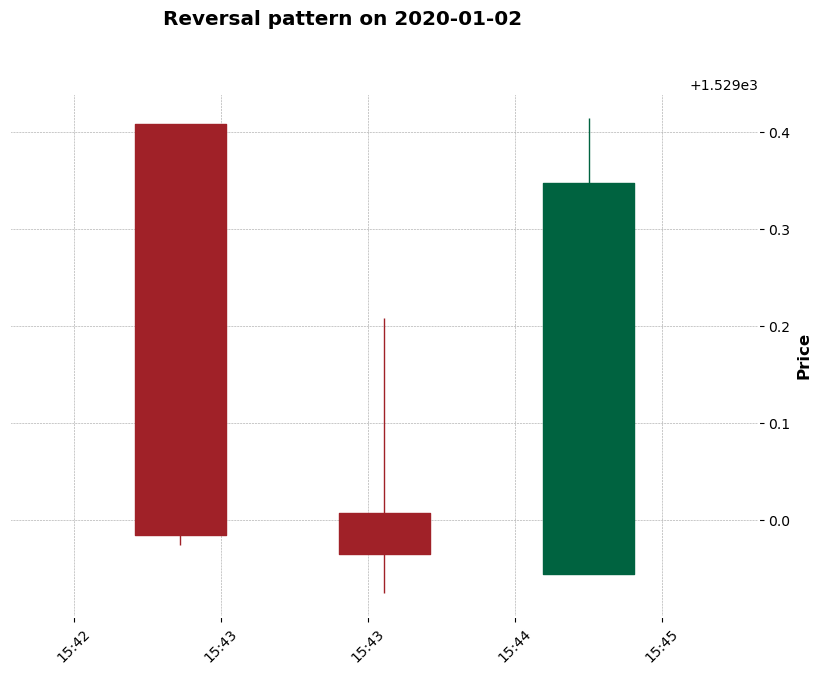

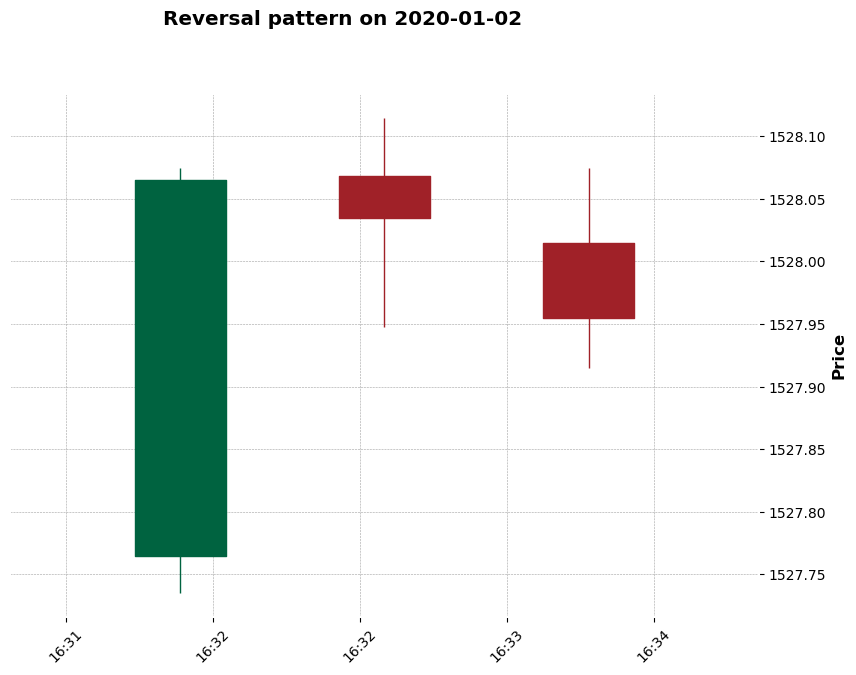

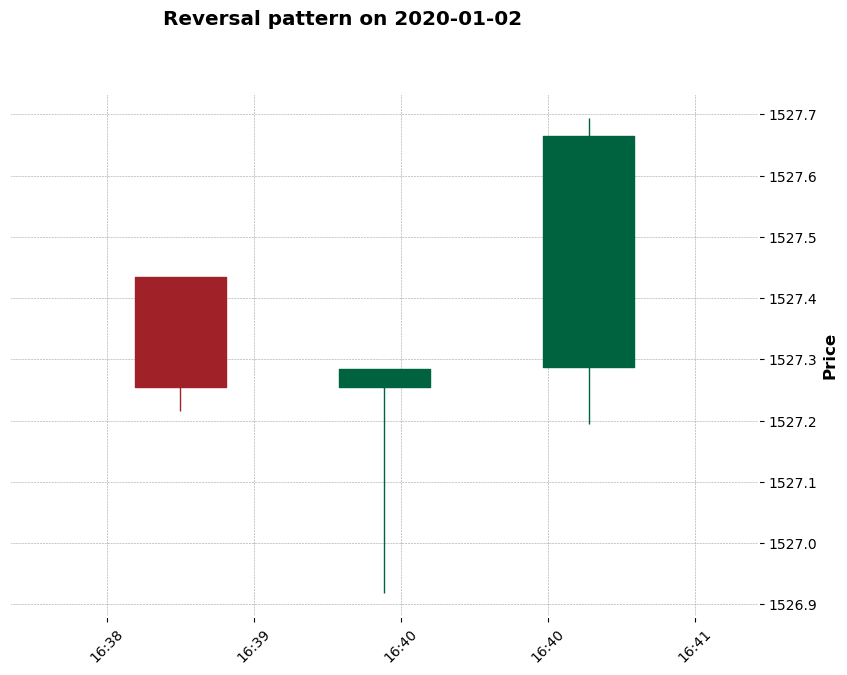

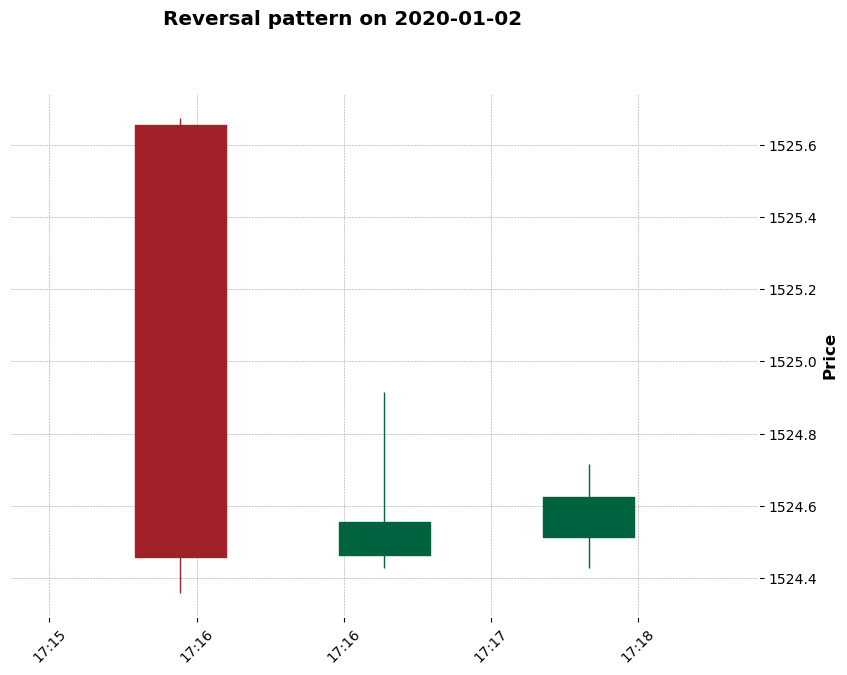

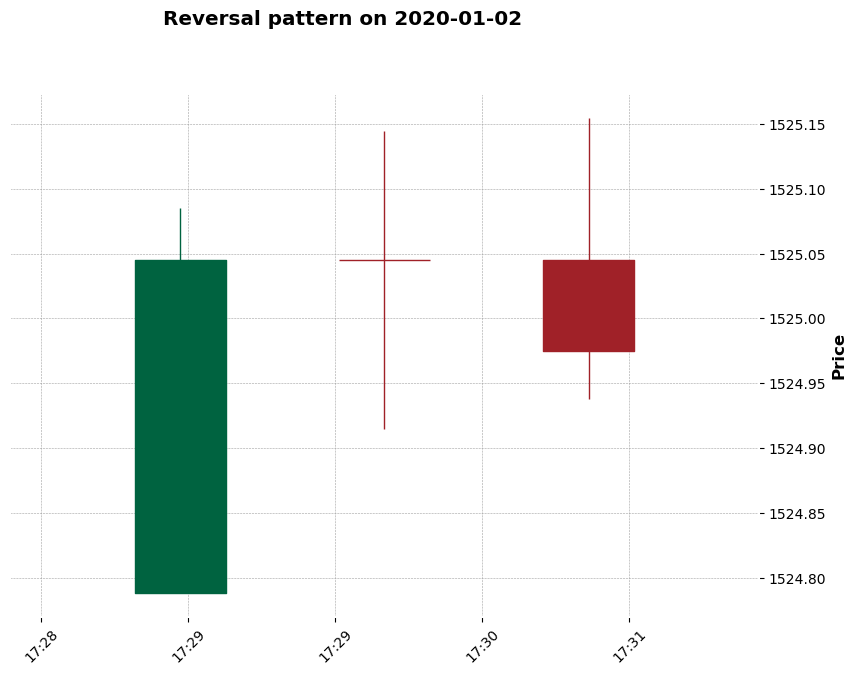

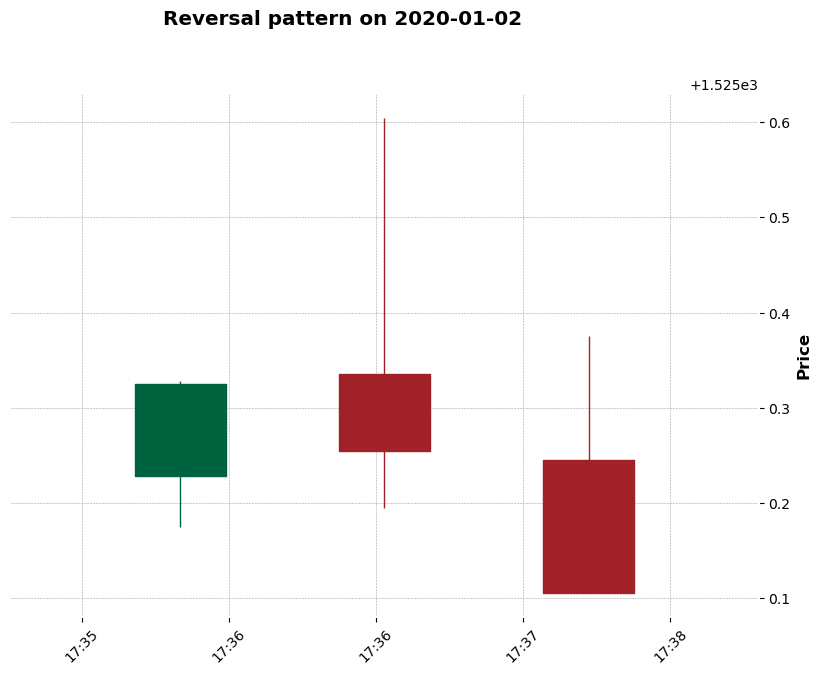

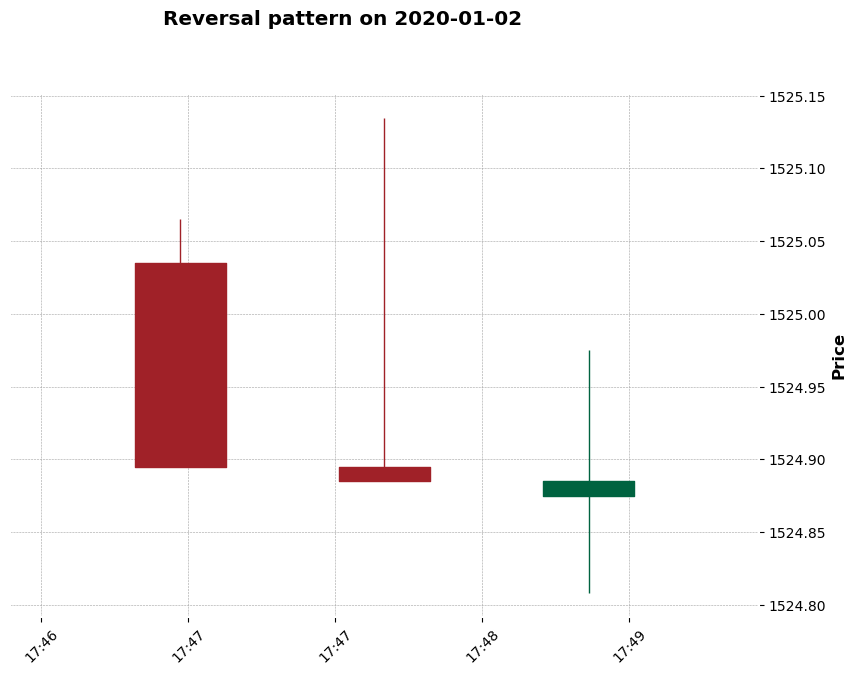

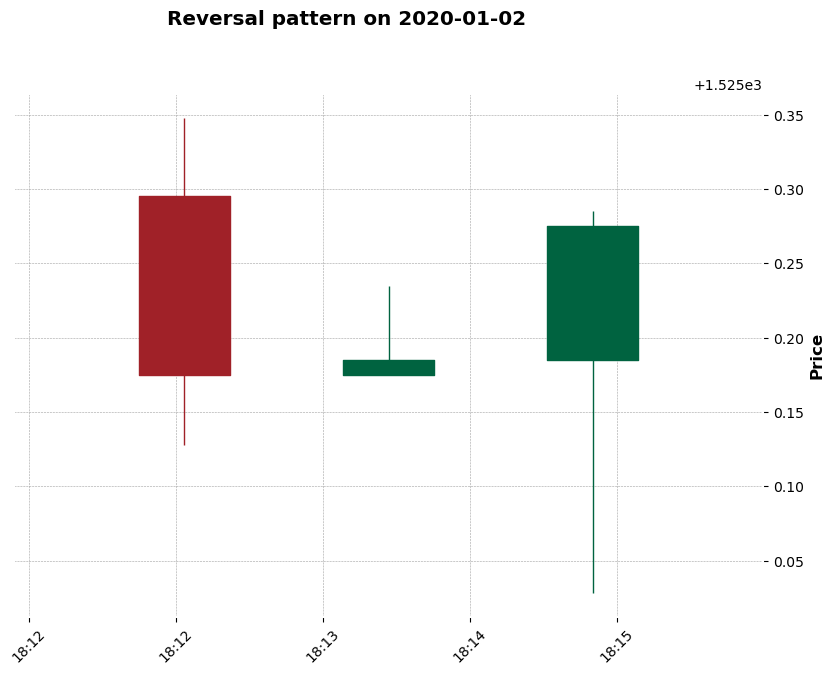

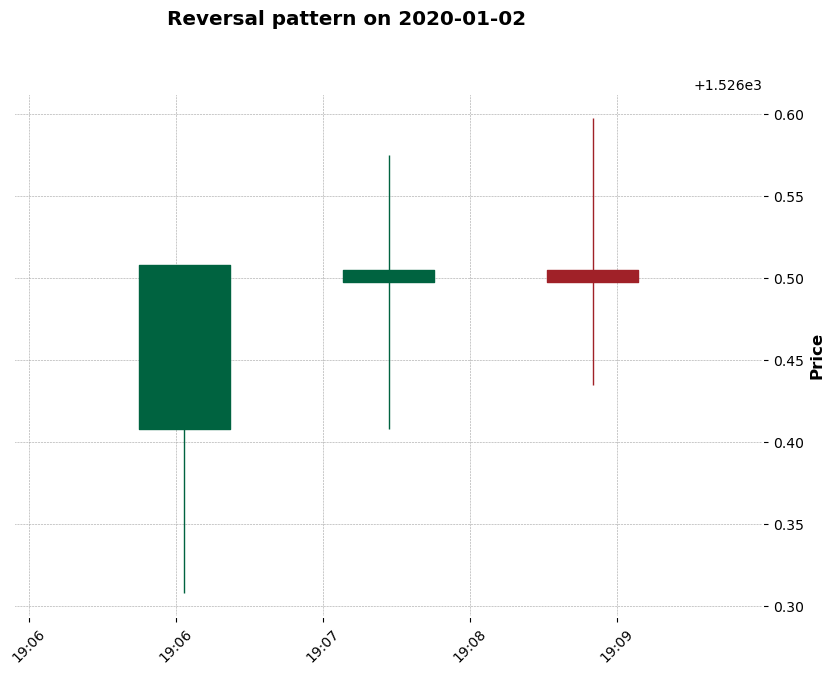

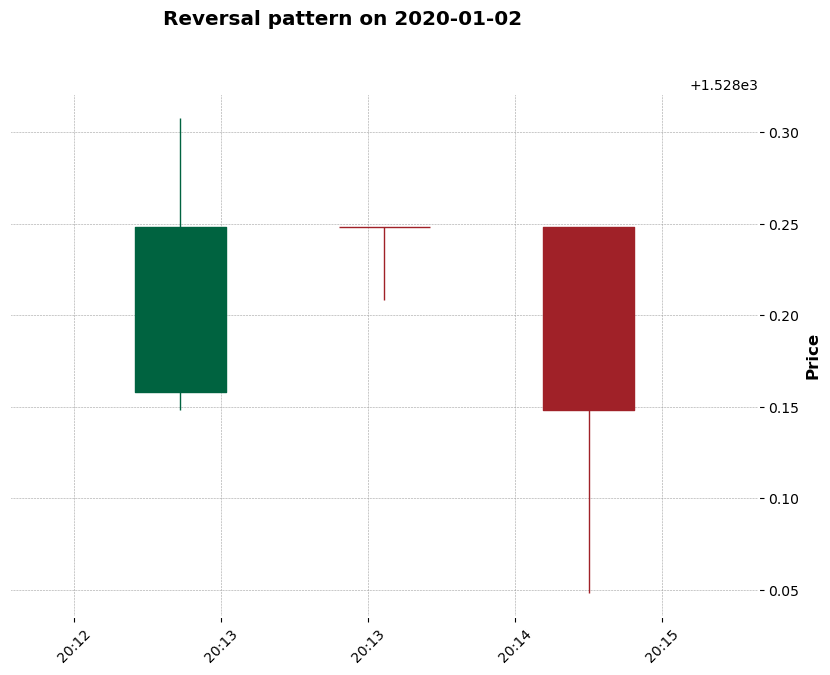

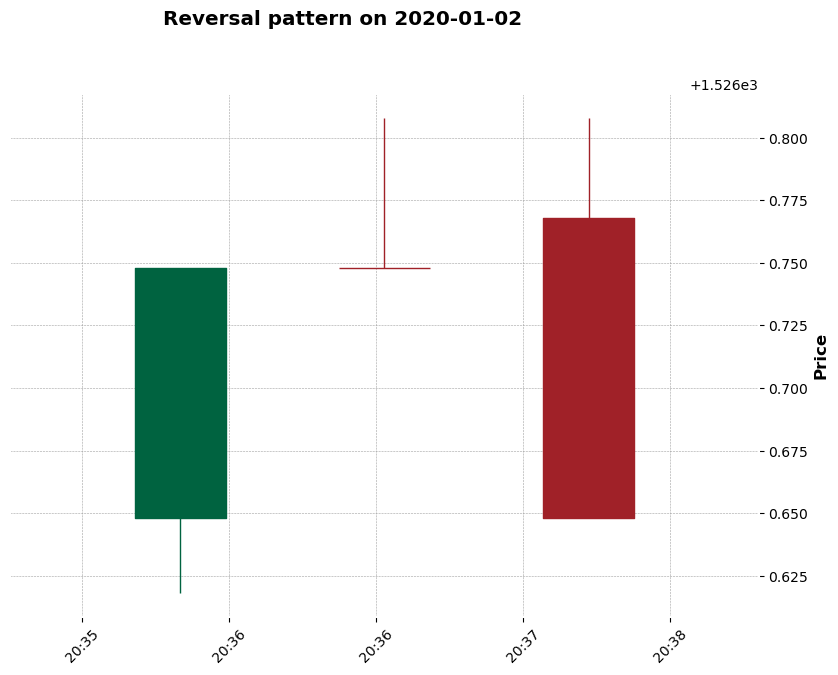

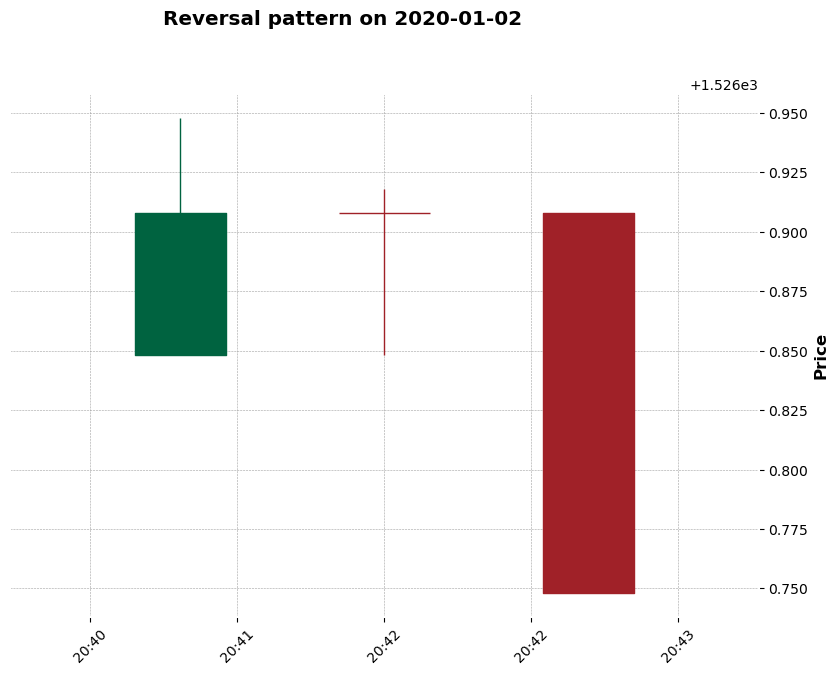

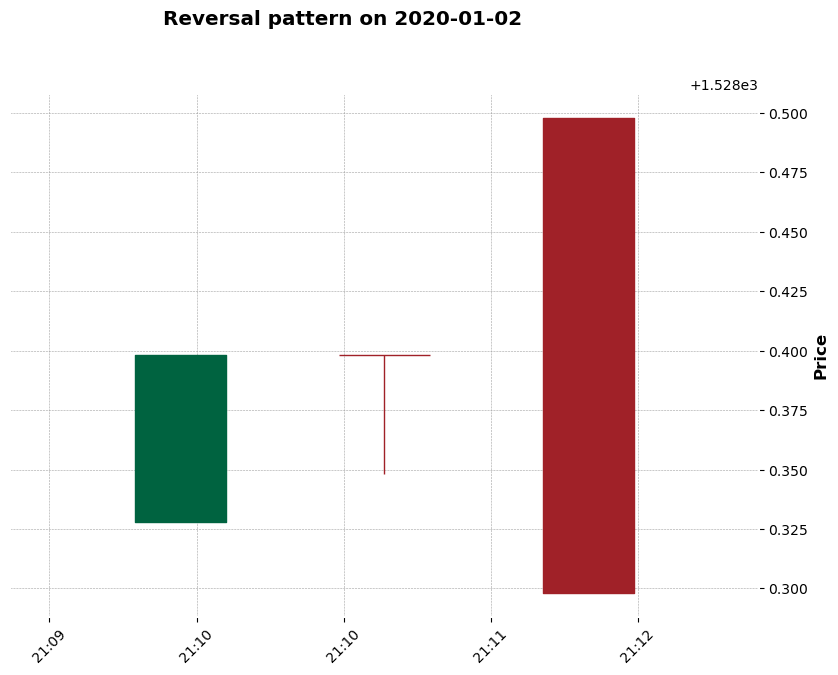

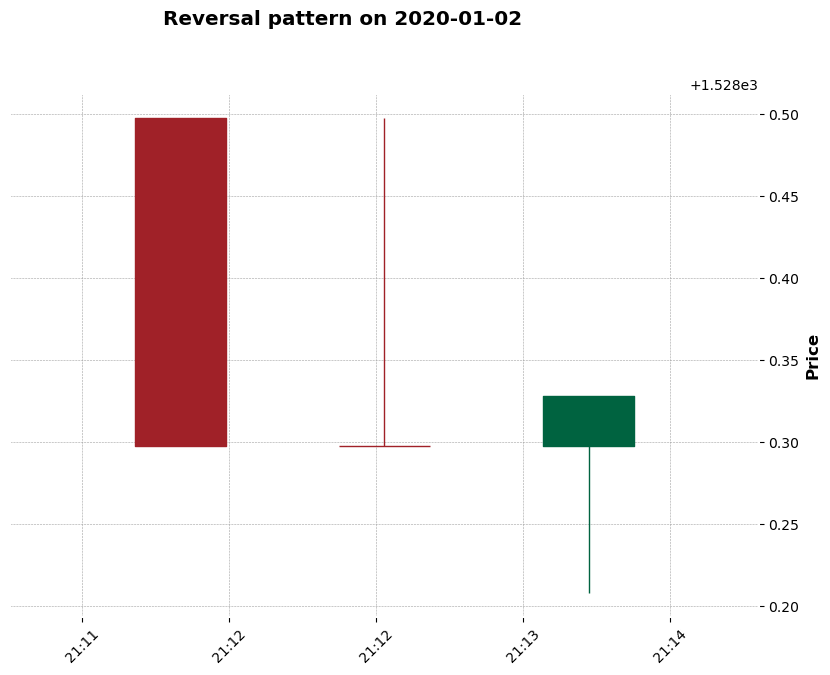

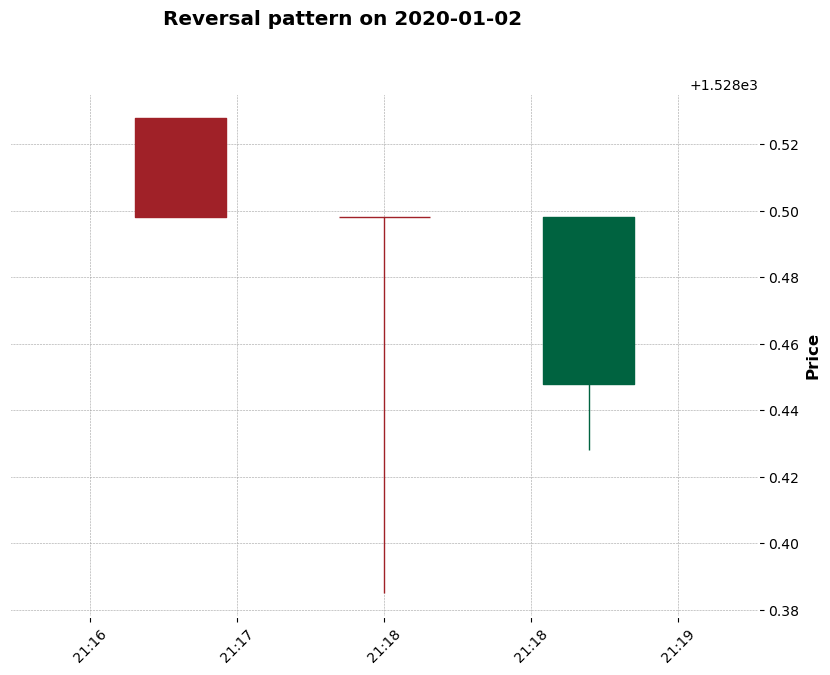

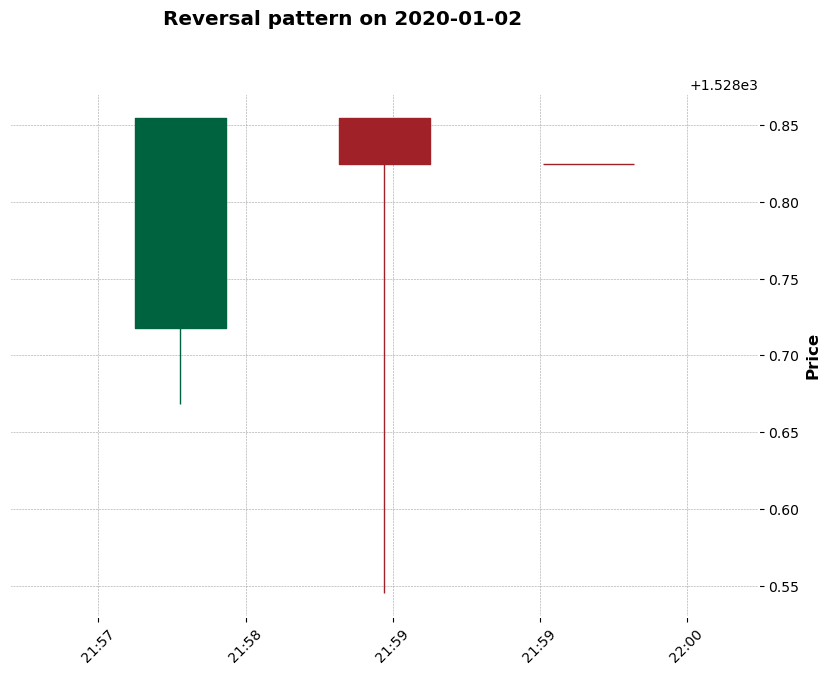

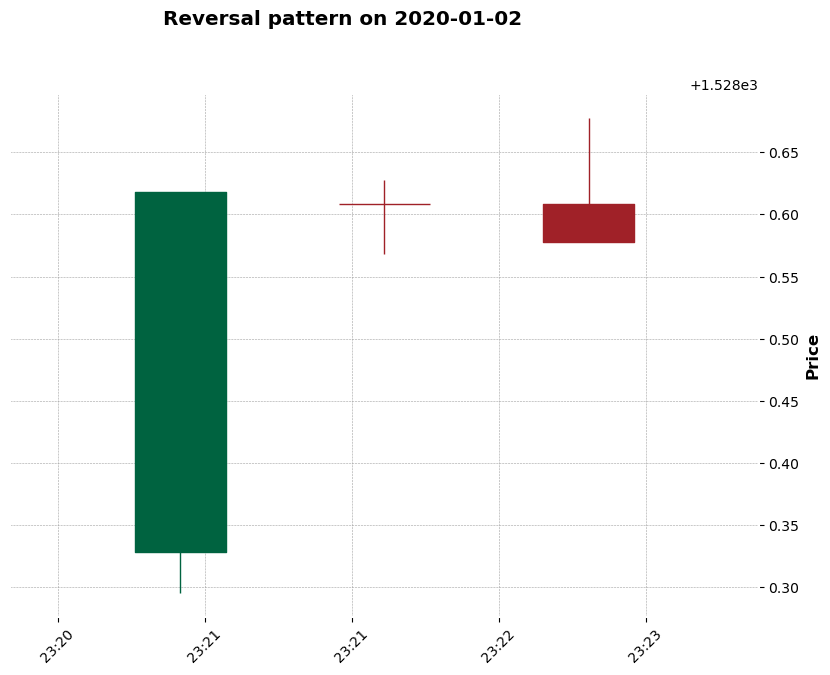

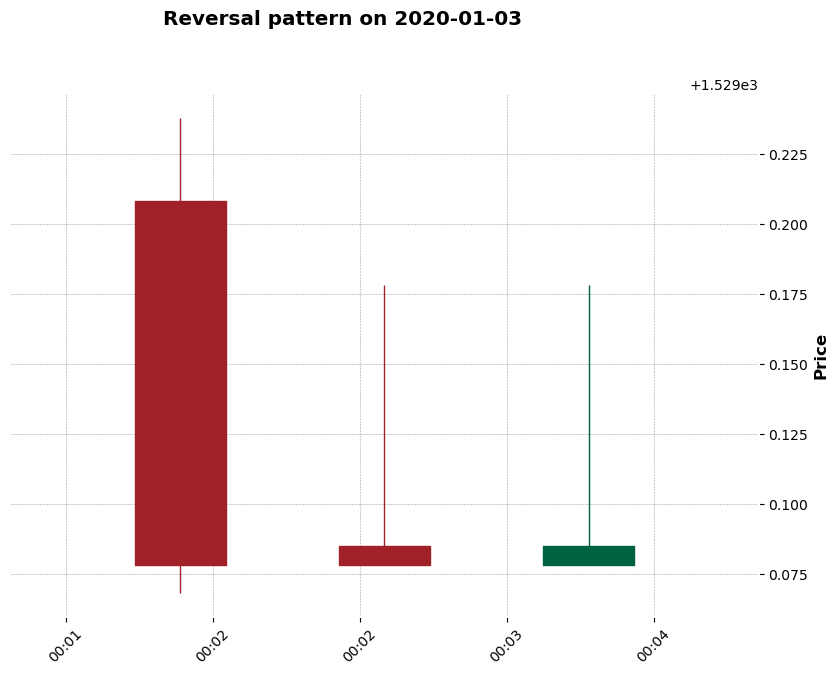

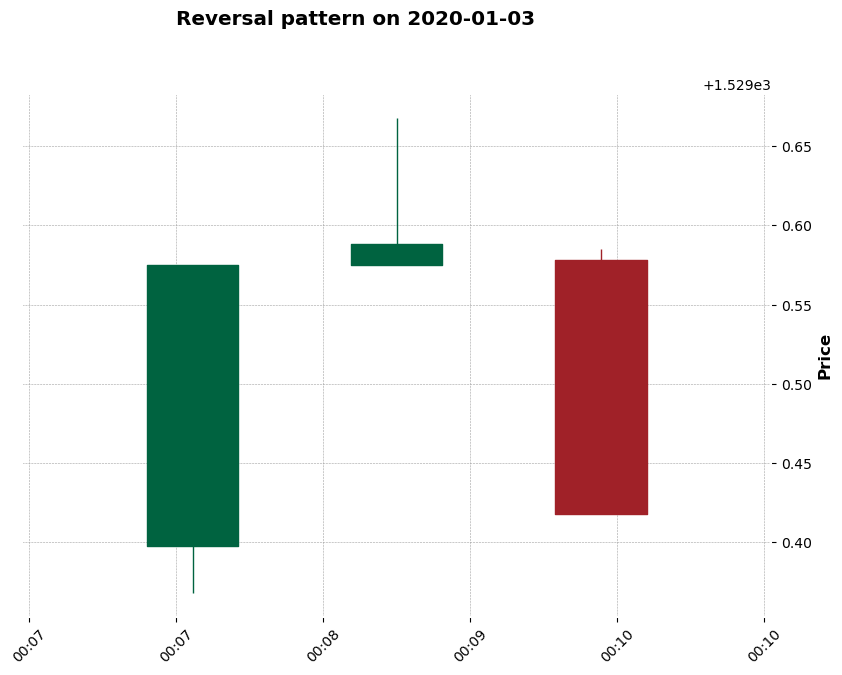

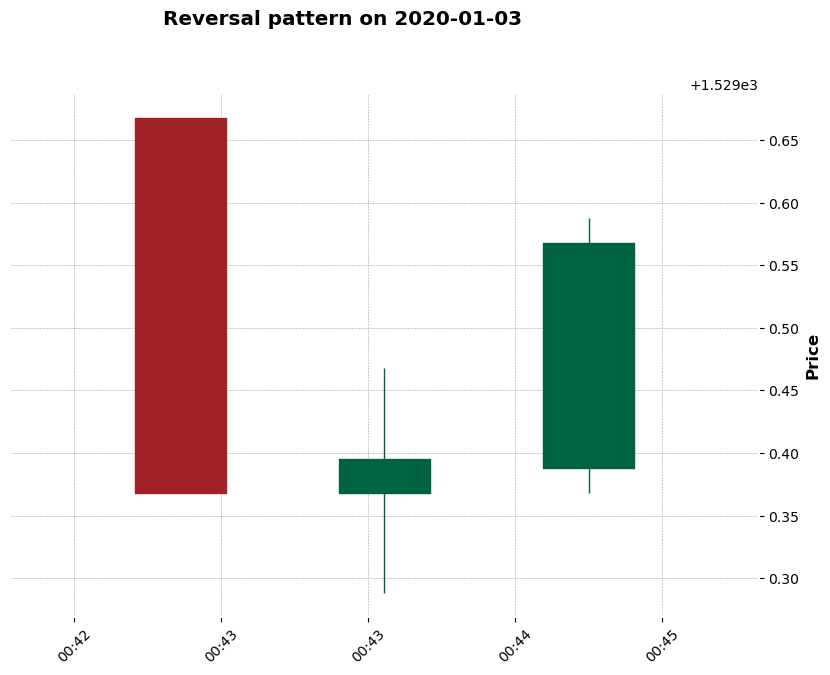

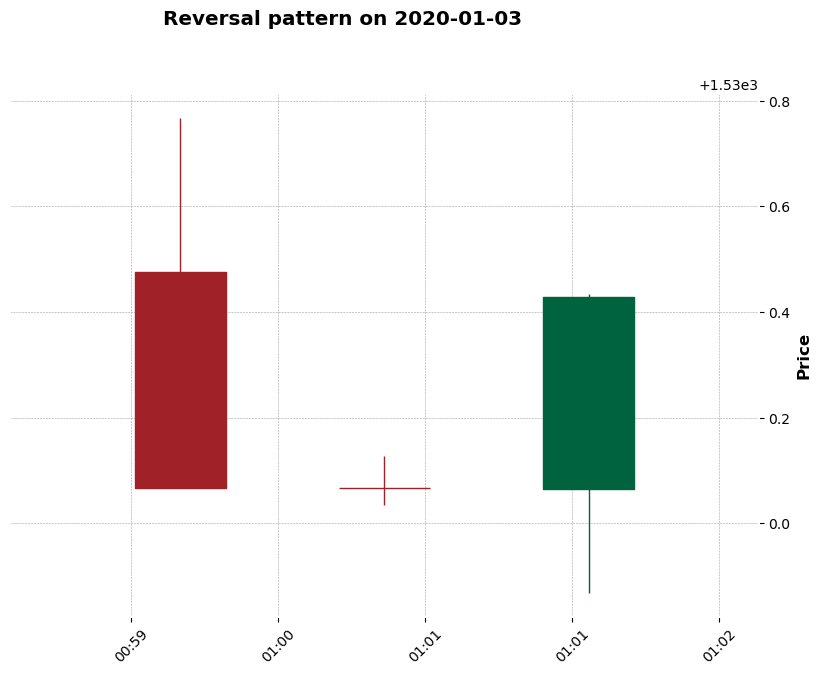

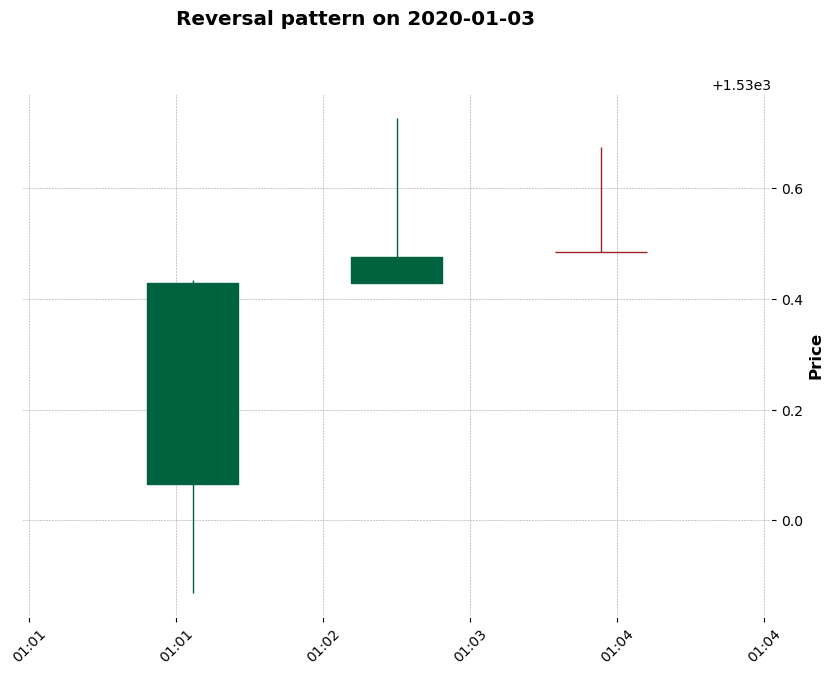

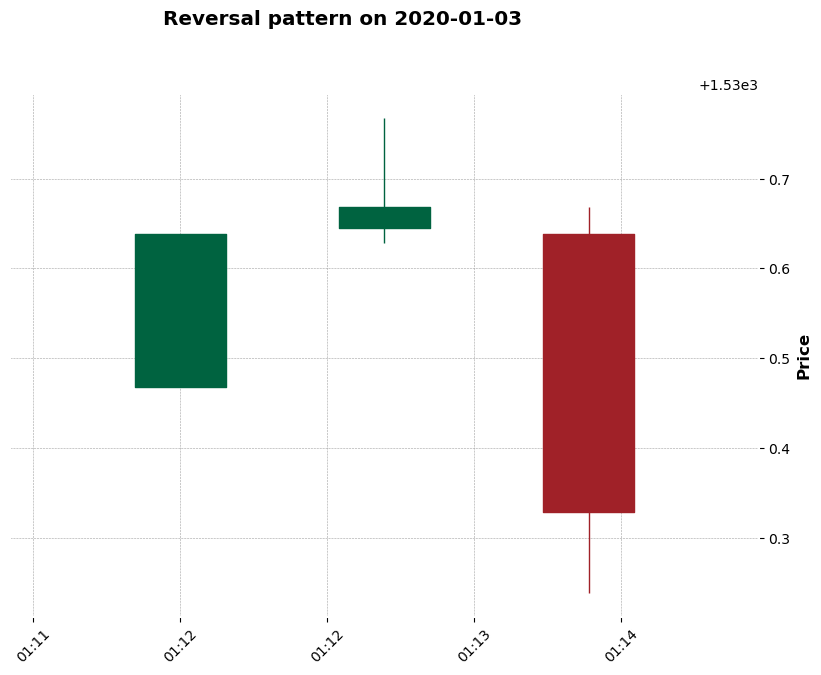

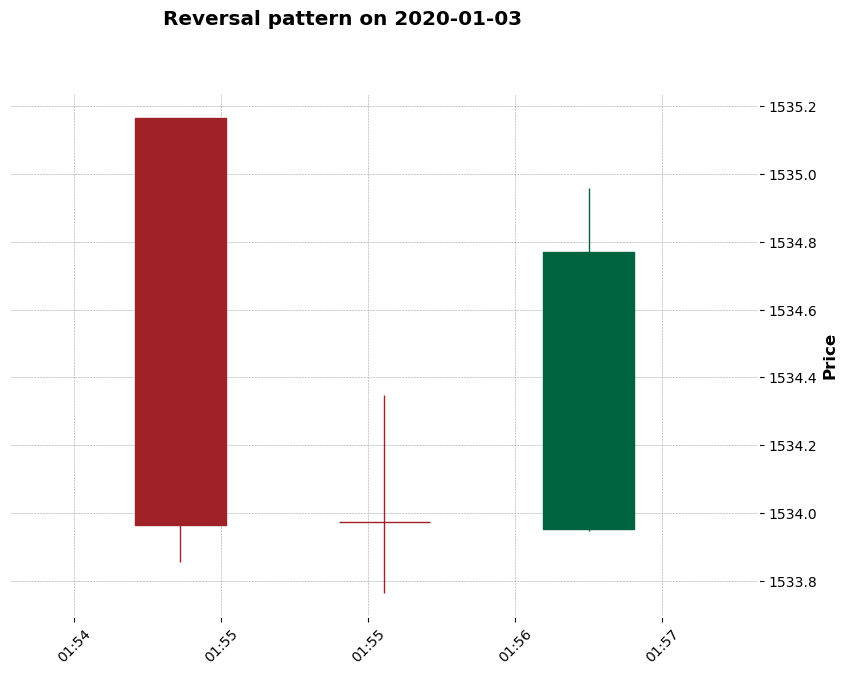

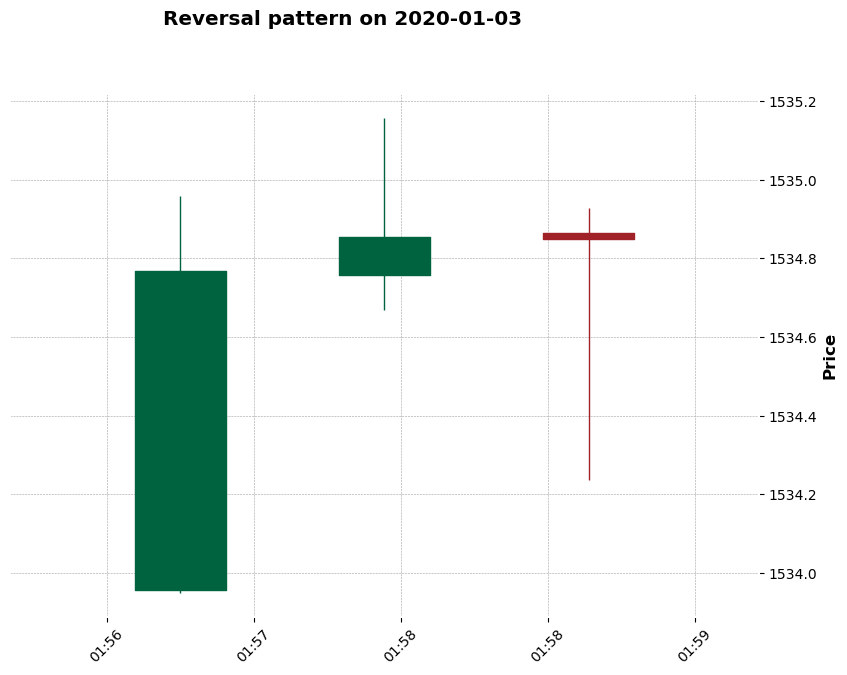

In [47]:
import pandas as pd
import mplfinance as mpf

# قراءة الملف
df= pd.read_csv(r"C:\Users\Access\Documents\AI ROBOT\XAUUSD_Candlestick_1_M_BID_2020-1-1_2024-12-31.csv")
# تحويل عمود التاريخ إلى datetime وتعيينه كمؤشر
df['Gmt time'] = pd.to_datetime(df['Gmt time'])
df.set_index('Gmt time', inplace=True)
df = df.head(3000)


# 2. دالة اكتشاف الإشارات
def detect_reversal_candles(df):
    df['Signal'] = None
    for i in range(2, len(df)):
        c1, c2, c3 = df.iloc[i-2], df.iloc[i-1], df.iloc[i]
        up1 = c1['Close'] > c1['Open']
        up3 = c3['Close'] > c3['Open']
        body1, body2 = abs(c1['Close']-c1['Open']), abs(c2['Close']-c2['Open'])
        range1, range2 = c1['High']-c1['Low'], c2['High']-c2['Low']
        if (body1 > 0.5*range1) and (body2 < 0.2*range2) and ((not up3) if up1 else up3):
            df.at[c3.name,'Signal'] = 'Reversal'
    return df

df = detect_reversal_candles(df)

# 3. اجمع مجموعات الشرائح (3 شموع لكل إشارة)
patterns = []
for dt in df.index[df['Signal']=='Reversal']:
    slice3 = df.loc[:dt].iloc[-3:]
    patterns.append((dt, slice3))

# 4. ارسم كل مجموعة على حدى
for dt, pat in patterns:
    mpf.plot(
        pat,
        type='candle',
        style='charles',
        title=f'Reversal pattern on {dt.date()}',
        ylabel='Price',
        figscale=1.3,
        show_nontrading=True
    )
